In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<font size="5" color="red">ch_12 데이터 시각화</font>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'
# 한글설정
plt.rc('font', family='Malgun Gothic')  # 윈도우용
# 경고를 인위적으로 안보이게
plt.rc('axes', unicode_minus=False)


# 2절 seaborn
- seaborn으로 그래프를 그리기 위해서 다음 단계를 따름
 1. 데이터 준비
 2. 미적 속성 설정(한글설정을 다시 해주어야 함) 
 3. 함수를 이용해서 그래프 그리기(수치형, 범주형, 쌍관계, 밀도, 회귀, 다중)
 4. 그래프 출력(show), 저장(save fig)

In [4]:
sns.__version__

'0.12.2'

## 2.1 데이터준비하기
- iris, titanic

In [6]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [7]:
iris.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [8]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
iris.species.unique() # 범주형 데이터들의 종류

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
iris['species'].value_counts() # 범주별 데이터 갯수


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [13]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
titanic.shape

(891, 15)

In [16]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 2.2 미적속성 설정하기(style, context, palette, figsize...)
### 1) 그래프 style 설정
- 범례 범례사용 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot (교안20page)

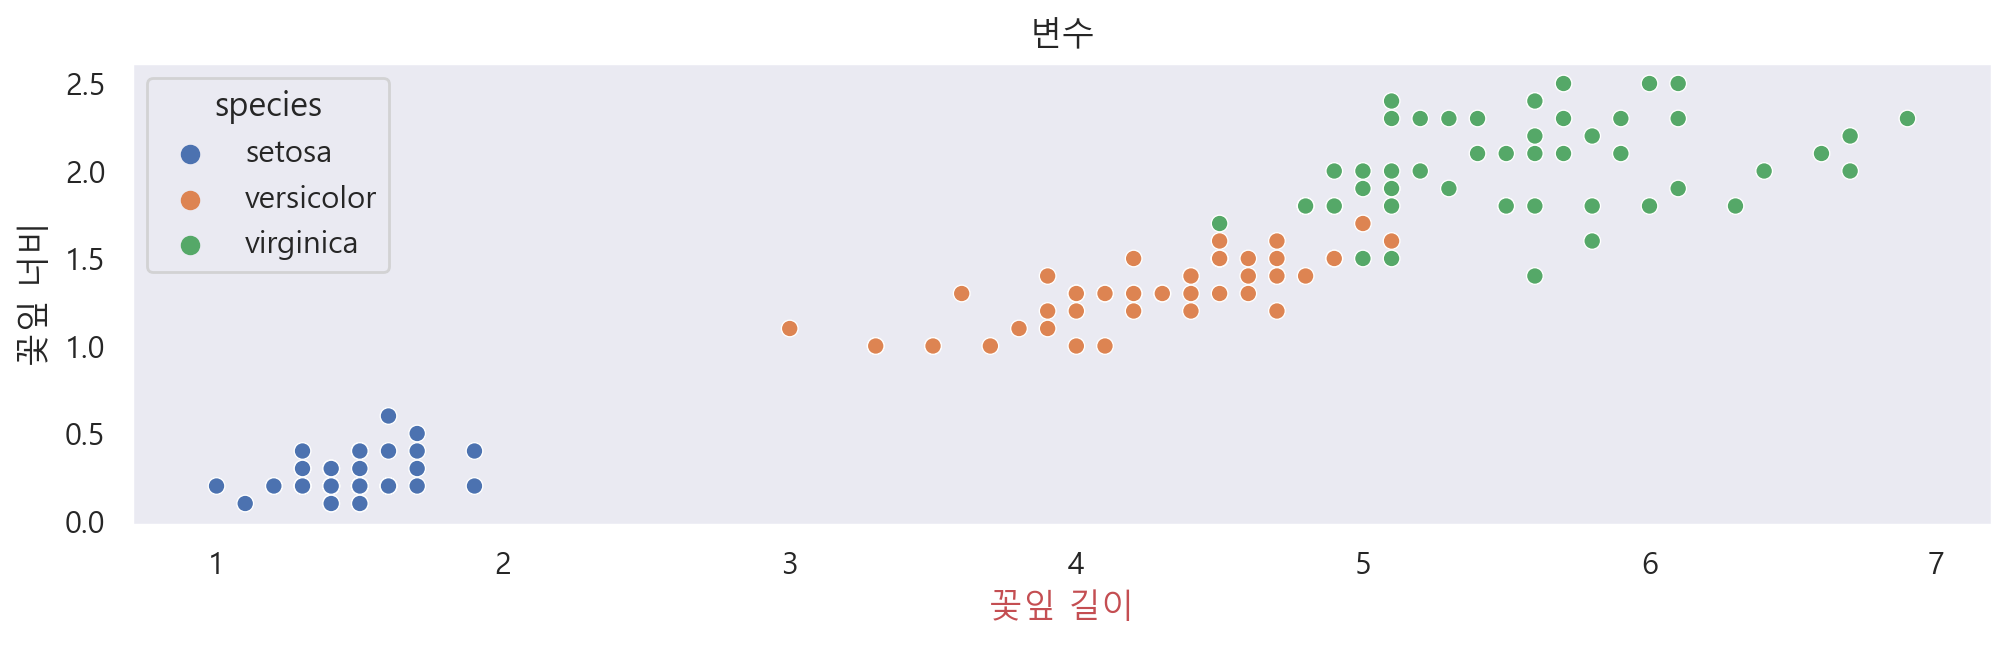

In [26]:
plt.figure(figsize=(12,3))
sns.set(style='dark')
plt.rc('font', family='Malgun Gothic')  # 윈도우용
# 경고를 인위적으로 안보이게
plt.rc('axes', unicode_minus=False)# white, whitegrid, dark, ticks
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
ax.set(title='변수',
      ylabel='꽃잎 너비')
ax.set_xlabel('꽃잎 길이', color='r')
plt.show()

### 2) 컨텍스트 지정(비율)

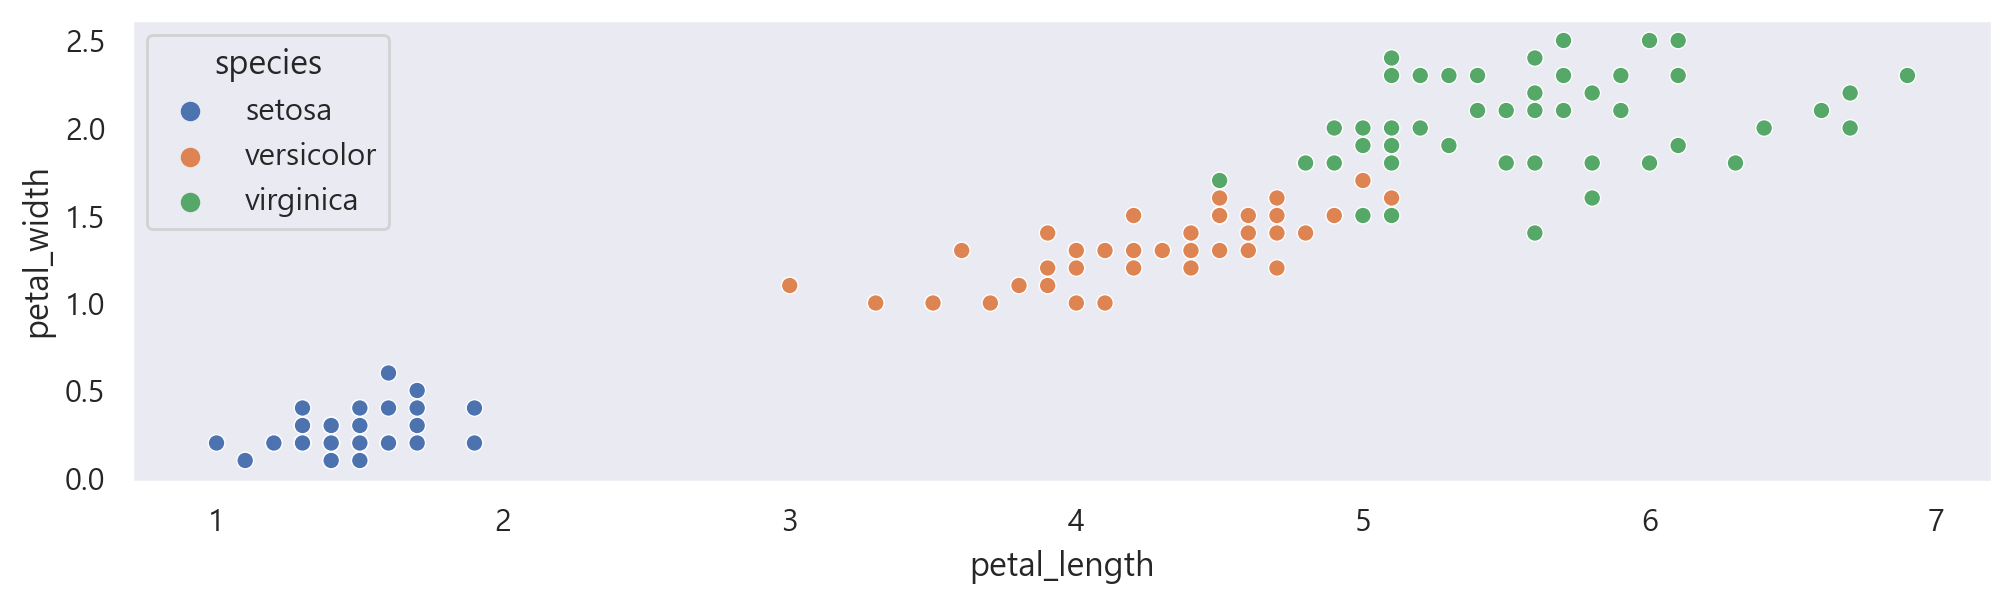

In [28]:
plt.figure(figsize=(12,3))
#sns.set(style='notebook')  # notebook(1.0), paper(0.8), talk(1.3), poster(1.8)
sns.set_context('notebook')
plt.rc('font', family='Malgun Gothic')  # 윈도우용
plt.rc('axes', unicode_minus=False)# white, whitegrid, dark, ticks
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.show()

### 컬러 팔레트
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://matplotlib.org/tutorials/colors/colormaps.html
- https://seaborn.pydata.org/tutorial/color_palettes.html

In [33]:
sns.set(palette='Pastel1', style = 'white', context='notebook', 
        rc={'figure.figsize':(10,3)}) # 기본 미적 속성 설정
plt.rc('font', family='Malgun Gothic')  # 윈도우용
plt.rc('axes', unicode_minus=False)# 축의 꺠짐 방지


## 2.3 Seaborn 함수로 그래프 그리기
### 1)관계형 그래프
        - x 축이 수치형 그래프
        (ex) scatterplot, lineplot => replot(서브플롯)

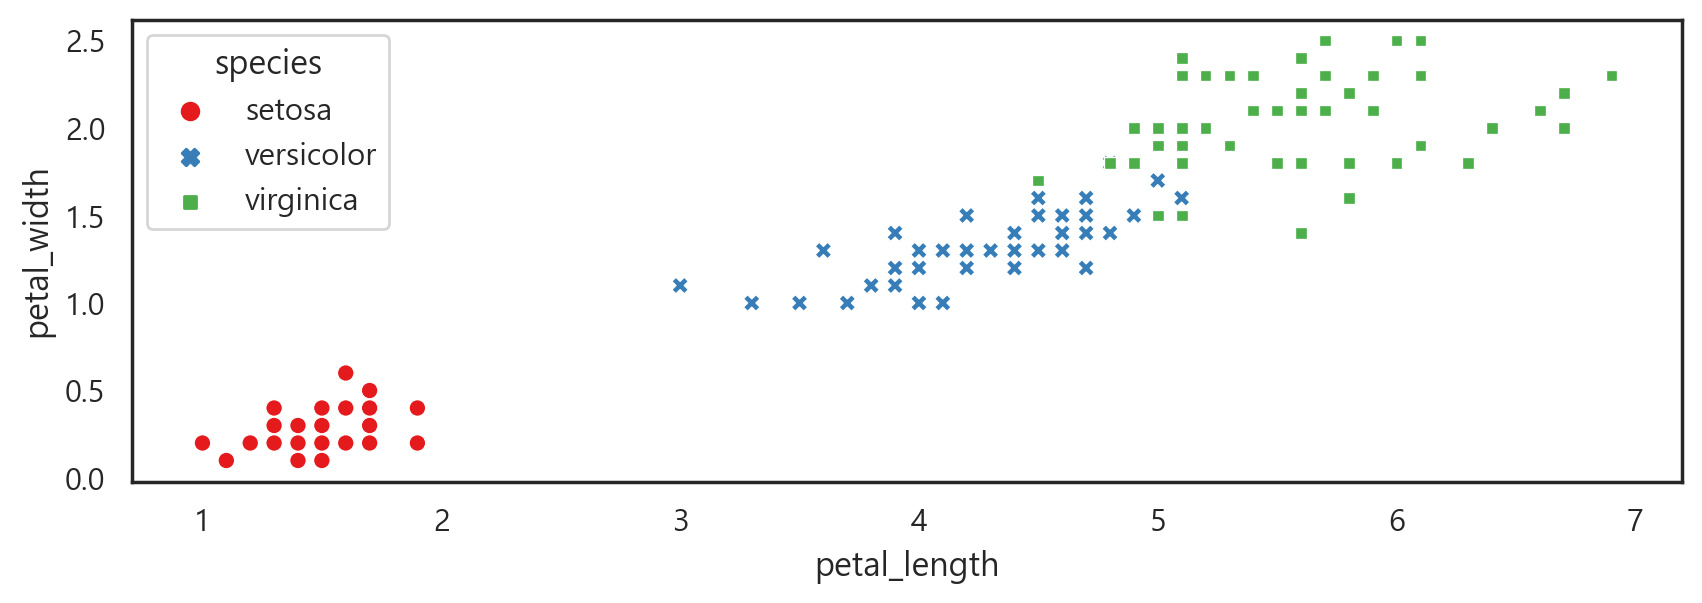

In [38]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species',
               palette='Set1', style='species')
plt.show()

<Axes: xlabel='petal_length', ylabel='petal_width'>

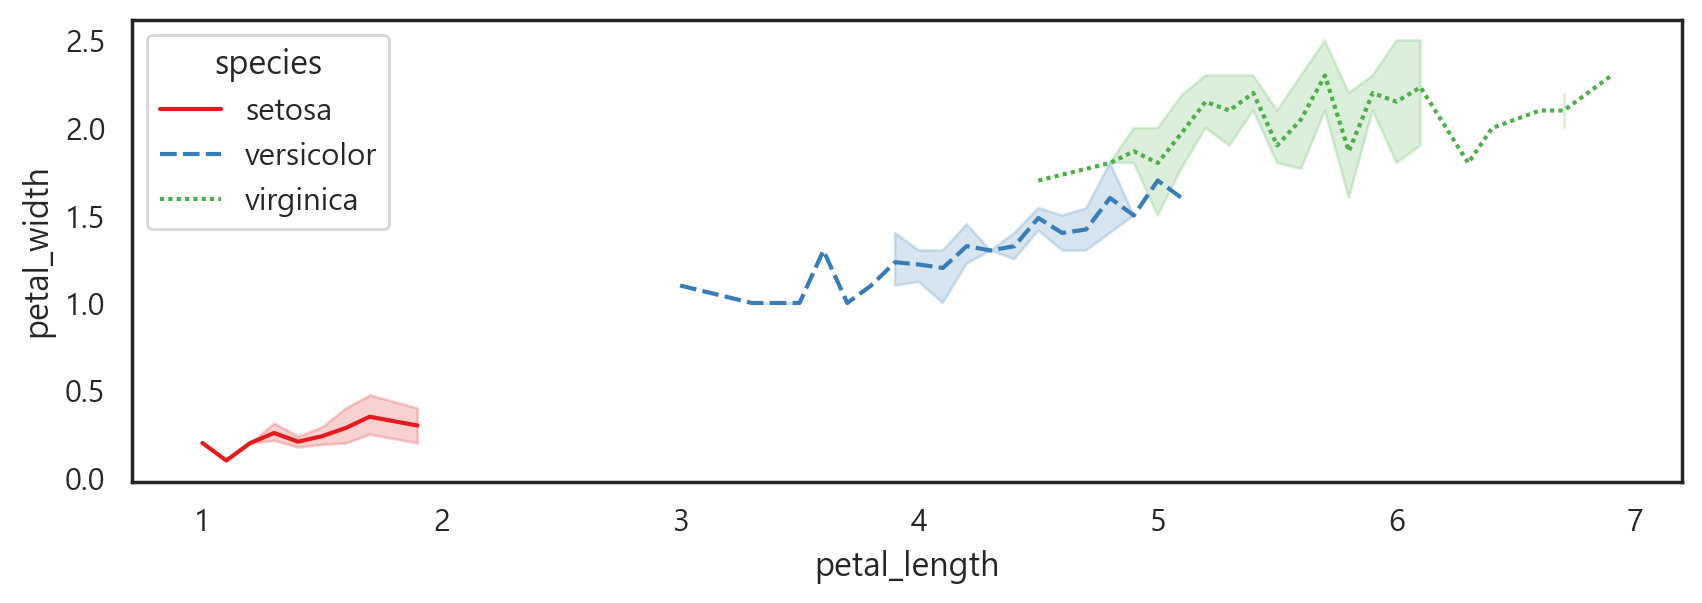

In [39]:
# 종별 lineplot
sns.lineplot(data=iris, x='petal_length', y='petal_width',
            hue = 'species', palette='Set1', style='species')
# 음영구간은 95% 신뢰구간을 뜻한다.

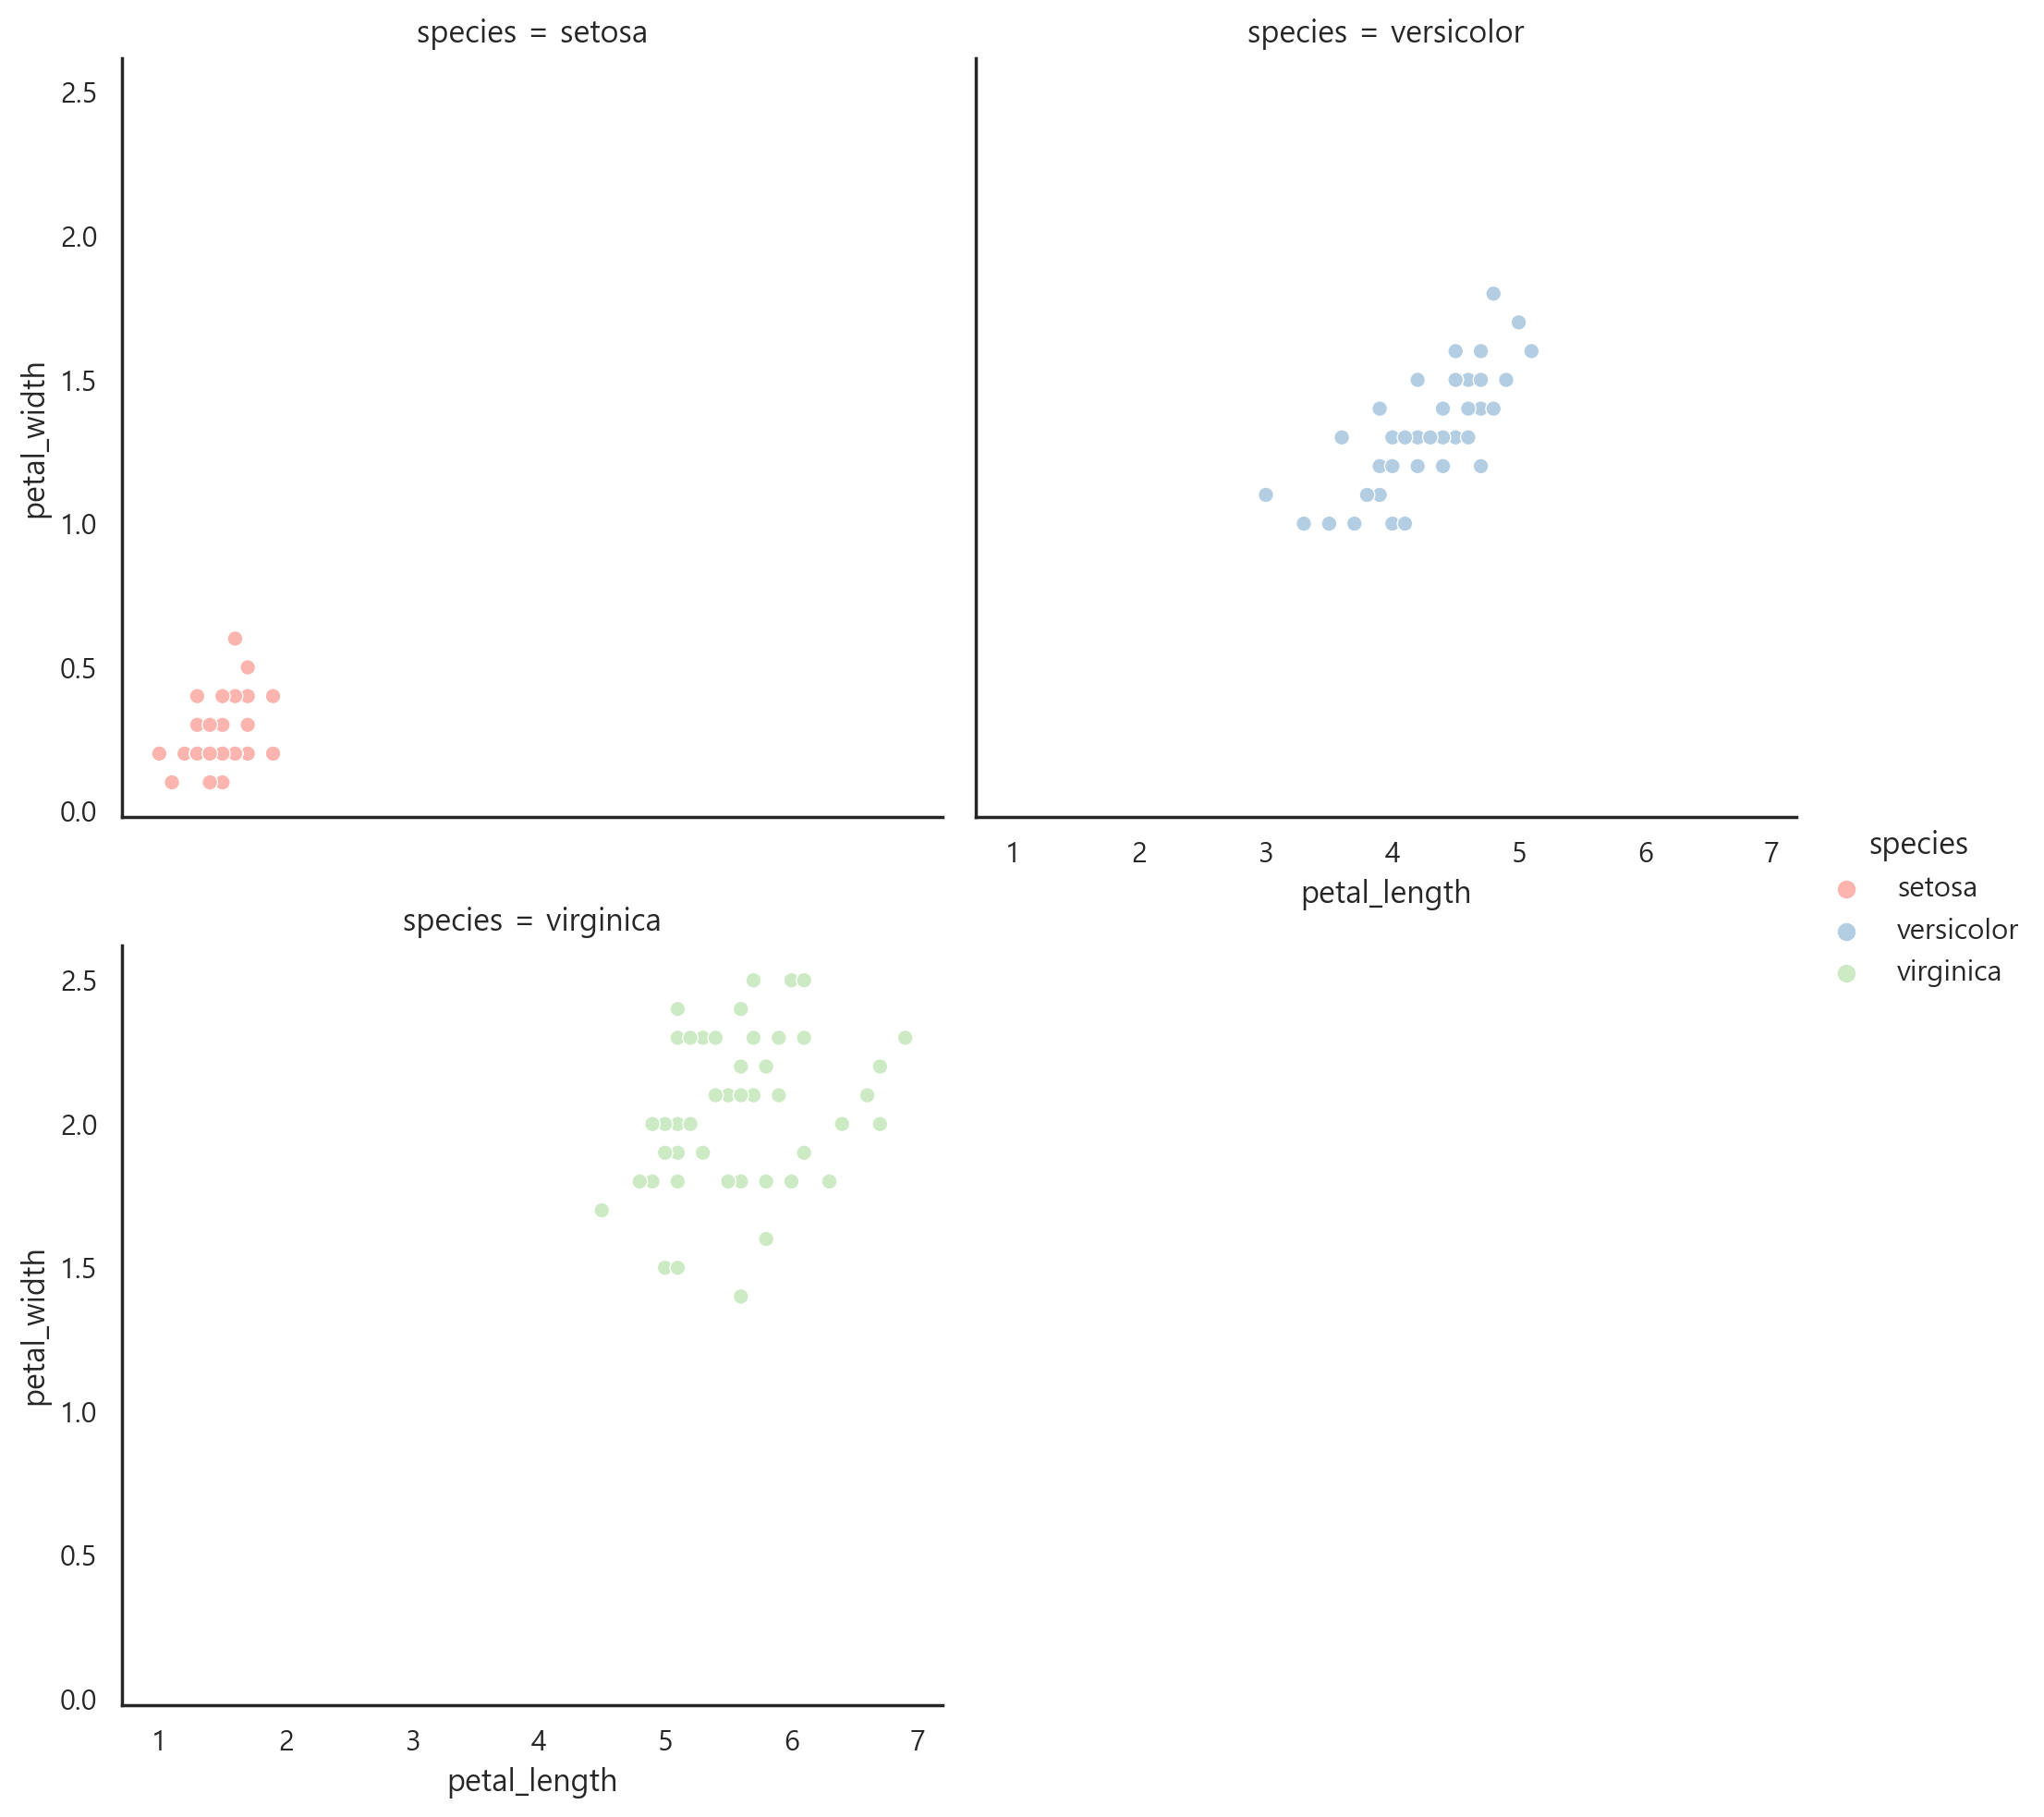

In [43]:
# 종별 lineplot 을 서브플롯으로
sns.relplot(data=iris, x='petal_length', y='petal_width',
            hue = 'species',
          #  kind='line', kind= 'scatter'가 기본값
             col='species', # species별 서브플롯
            col_wrap=2   # 한줄에 표현될 서브플롯 수
          )

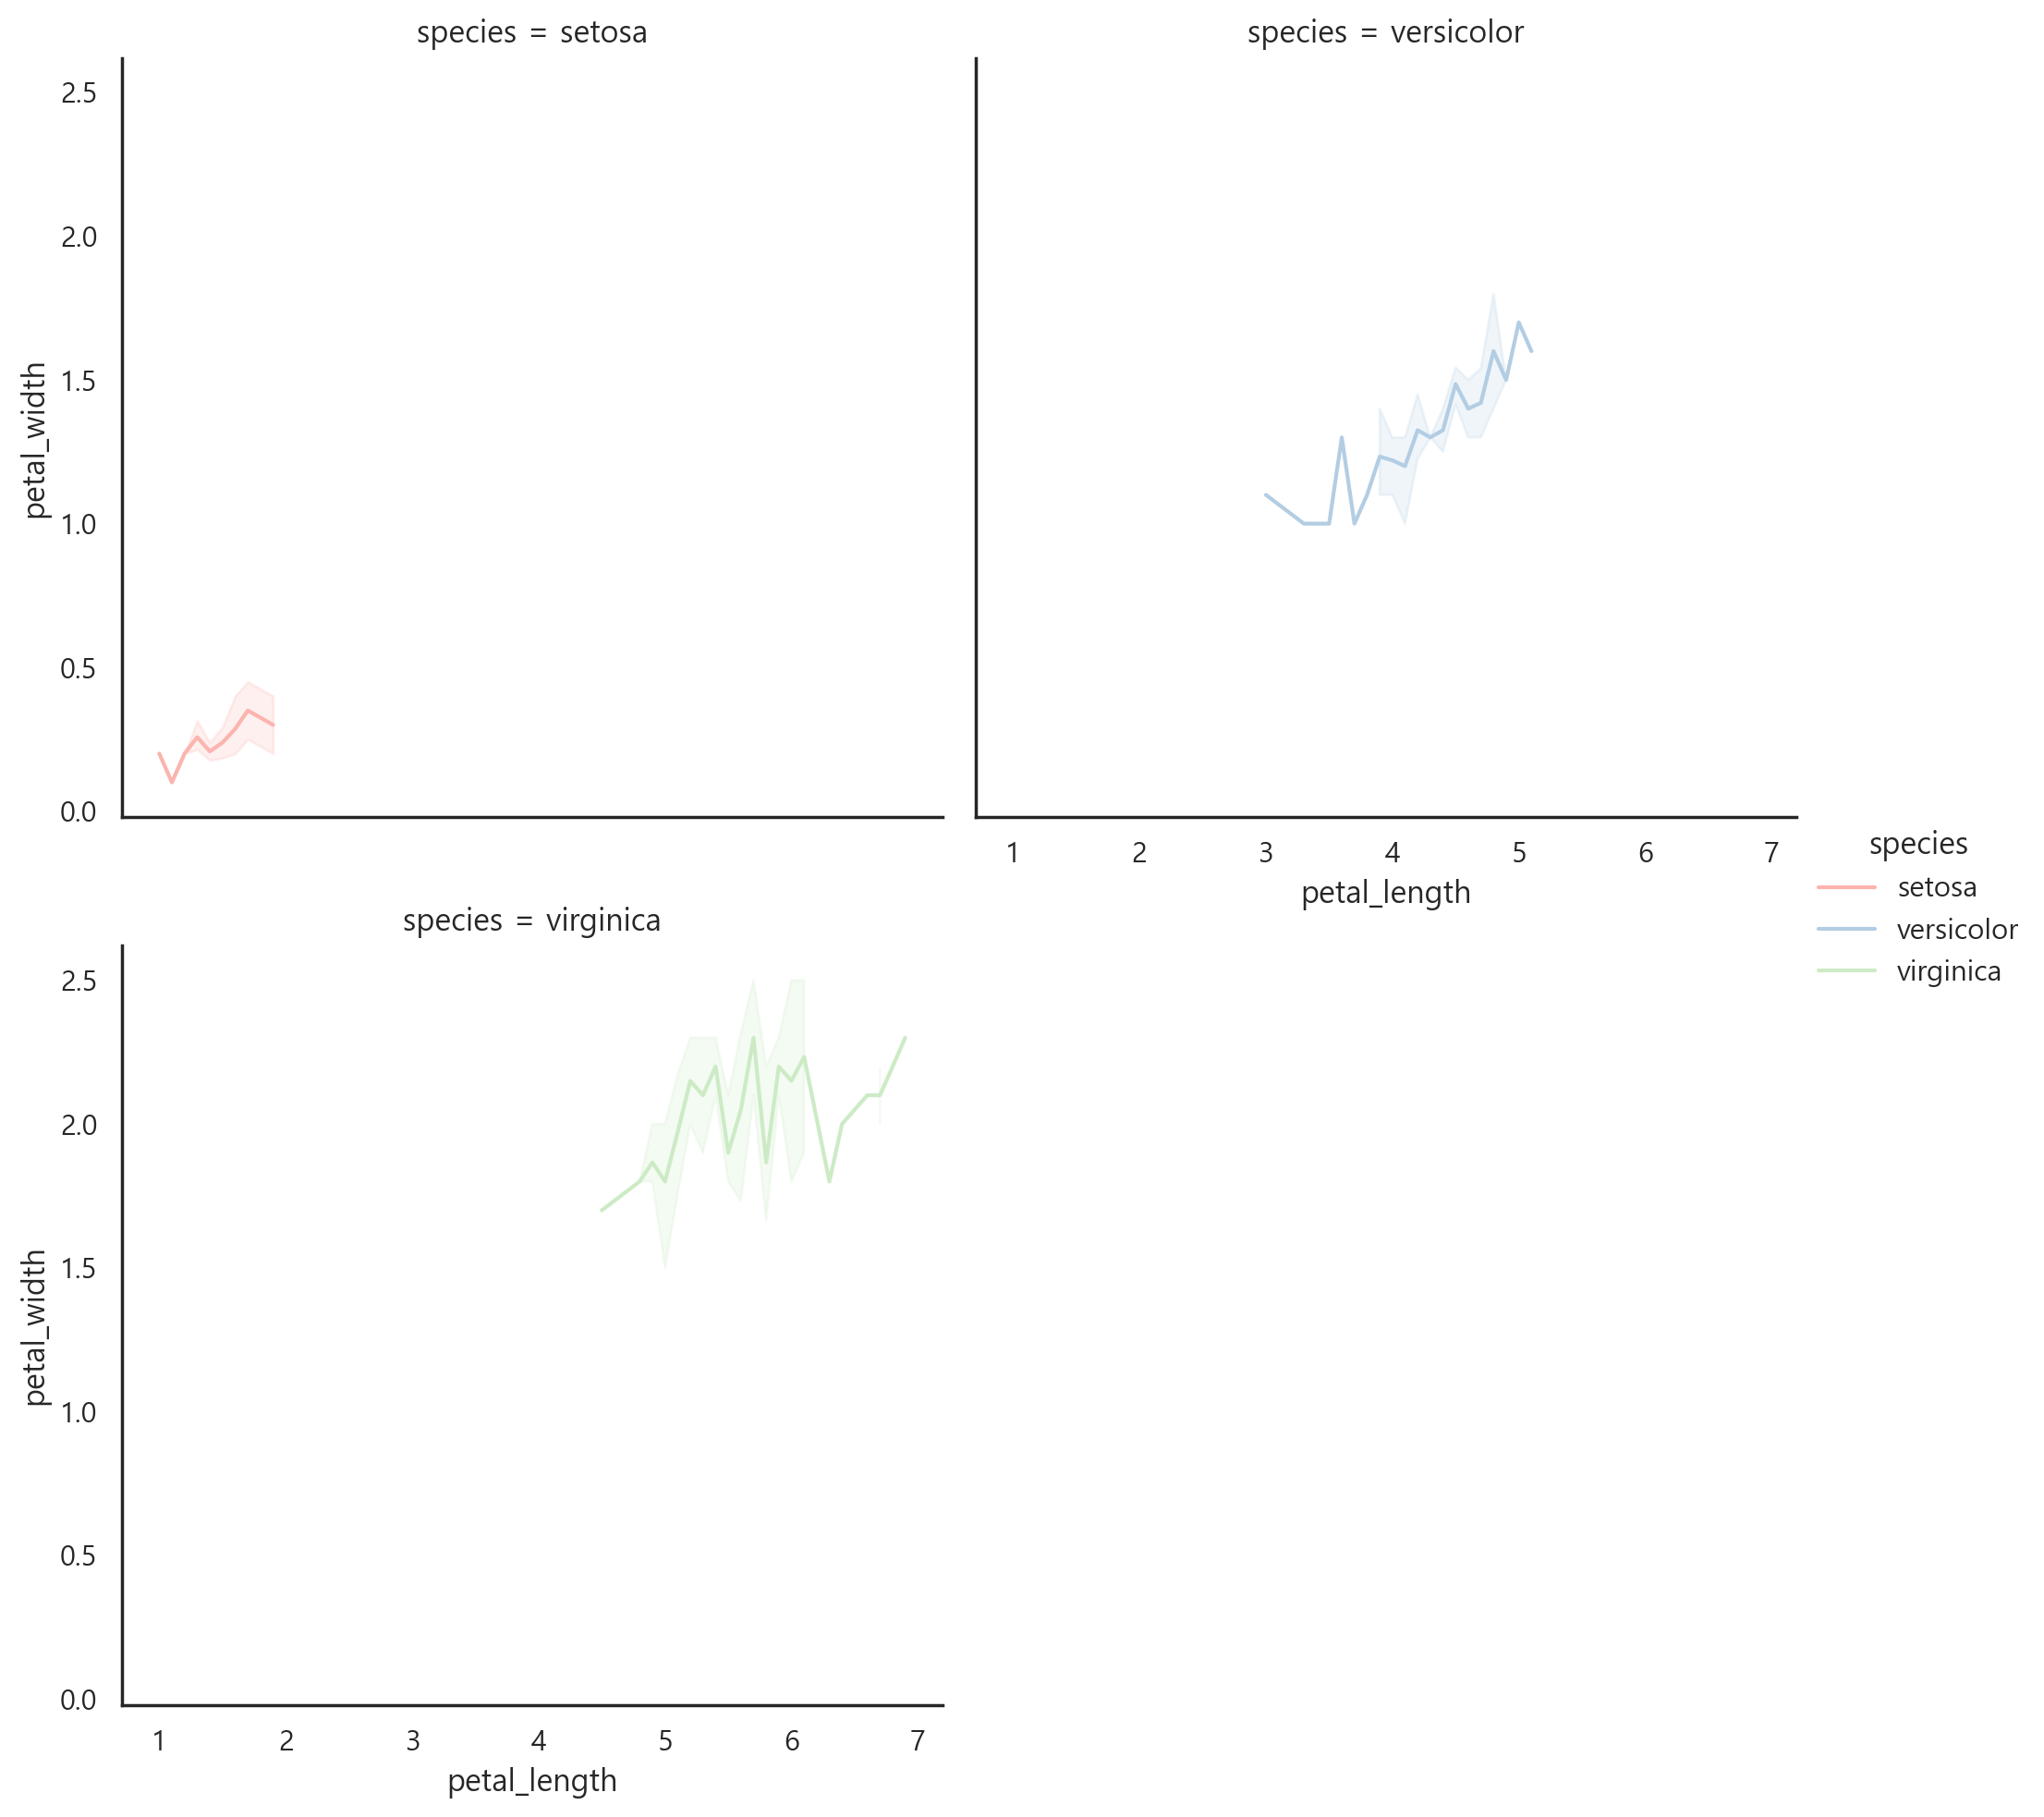

In [44]:
sns.relplot(data=iris, x='petal_length', y='petal_width',
            hue = 'species',
            kind='line',
          #  kind='line', kind= 'scatter'가 기본값
             col='species', # species별 서브플롯
            col_wrap=2   # 한줄에 표현될 서브플롯 수
          )

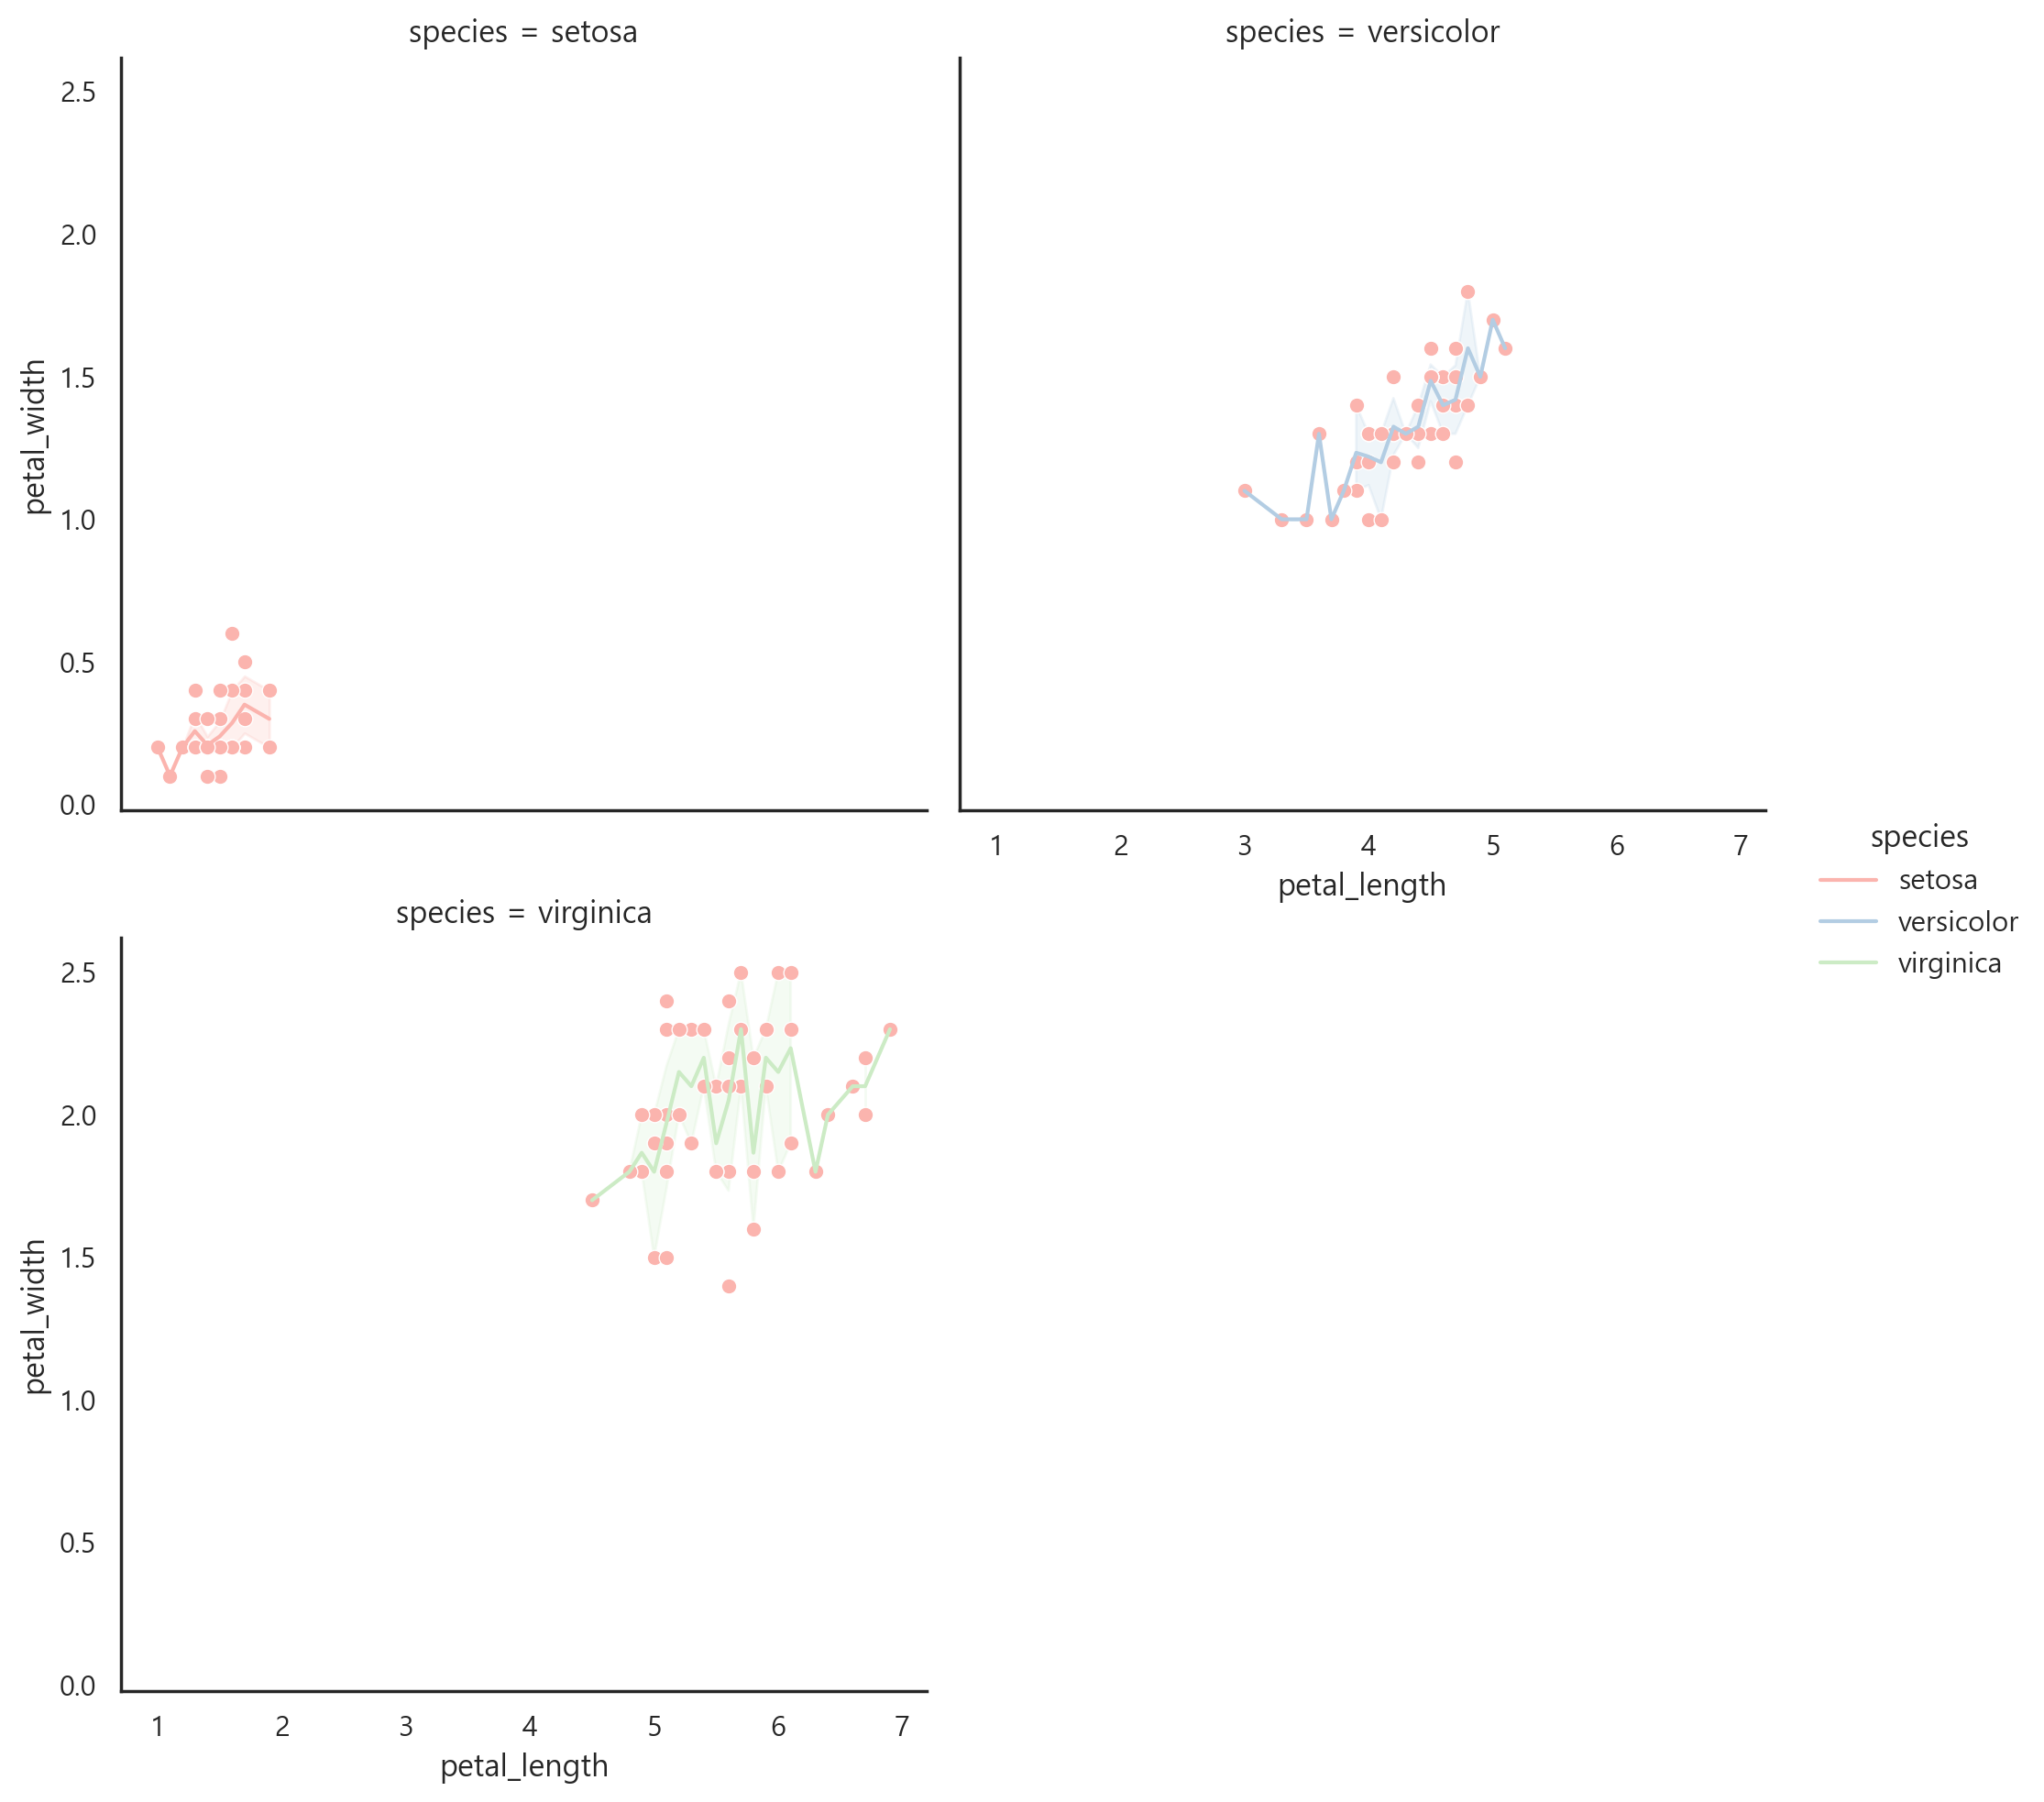

In [45]:
# line 과 scatter를 종별 서브플롯으로 겹쳐서
g=sns.relplot(data=iris, x='petal_length', y='petal_width',
            hue = 'species',
            kind='line',
          #  kind='line', kind= 'scatter'가 기본값
             col='species', # species별 서브플롯
            col_wrap=2   # 한줄에 표현될 서브플롯 수
          )
# g그래프에 line 플롯을 추가
g.map_dataframe(sns.scatterplot, x='petal_length', y='petal_width')
# 크기조정 : 서브플롯함수에서는 내부적으로 figure 새로 만들기 때문에 figsize 무시
g.fig.set_size_inches(10,3)

<Axes: xlabel='petal_length', ylabel='petal_width'>

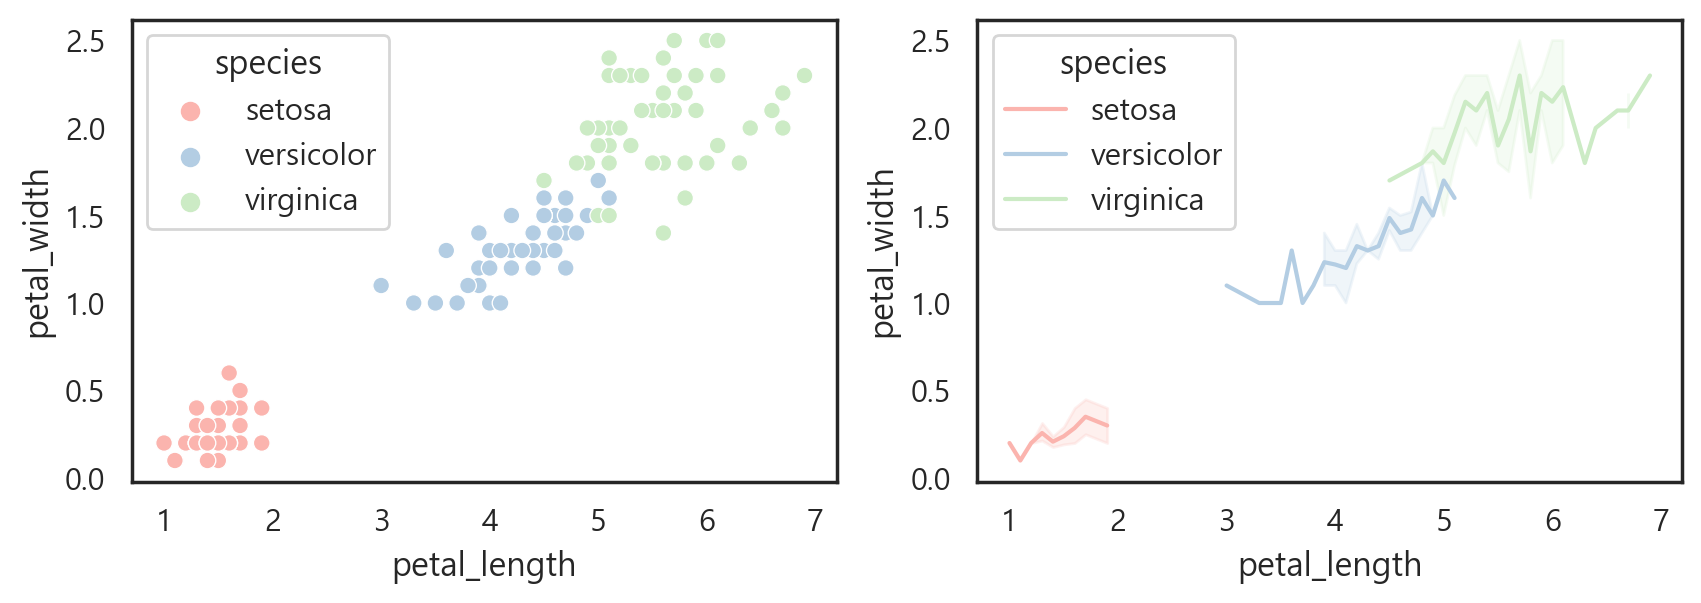

In [48]:
# ax[0]에는 scatter, ax[1] lineplot
fig, ax = plt.subplots(1, ncols=2)
sns.scatterplot(data=iris, 
                x='petal_length', 
                y='petal_width',
                hue='species',
                ax=ax[0])
sns.lineplot(data=iris, 
                x='petal_length', 
                y='petal_width',
                hue='species',
                ax=ax[1])

### 2) 범주형 그래프
     - x 축이 범주형 데이터
    (ex) stripplot(무작위 흩뿌림), swarmplot(겹치지않는산점도)
         barplot, barhplot(y의 평균으로 막대그래프), pointplot(y의 평균으로 line)
         countplot(count는 x의 빈도수가 높이)
         boxplot, vilionplot, boxenplot
         => catplot(서브플롯)

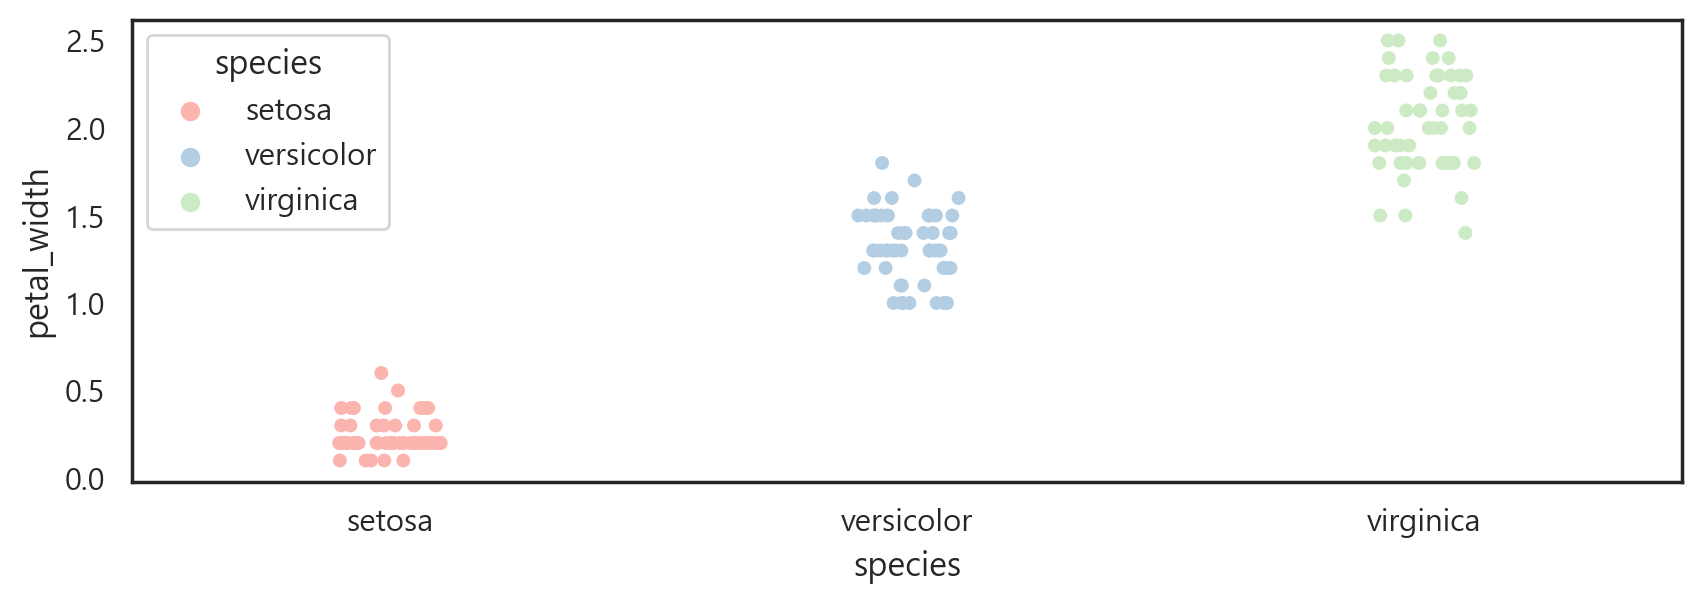

In [55]:
# x축이 범주형일때 산점도
sns.stripplot(data=iris, x='species', y='petal_width', hue = 'species')
plt.show()

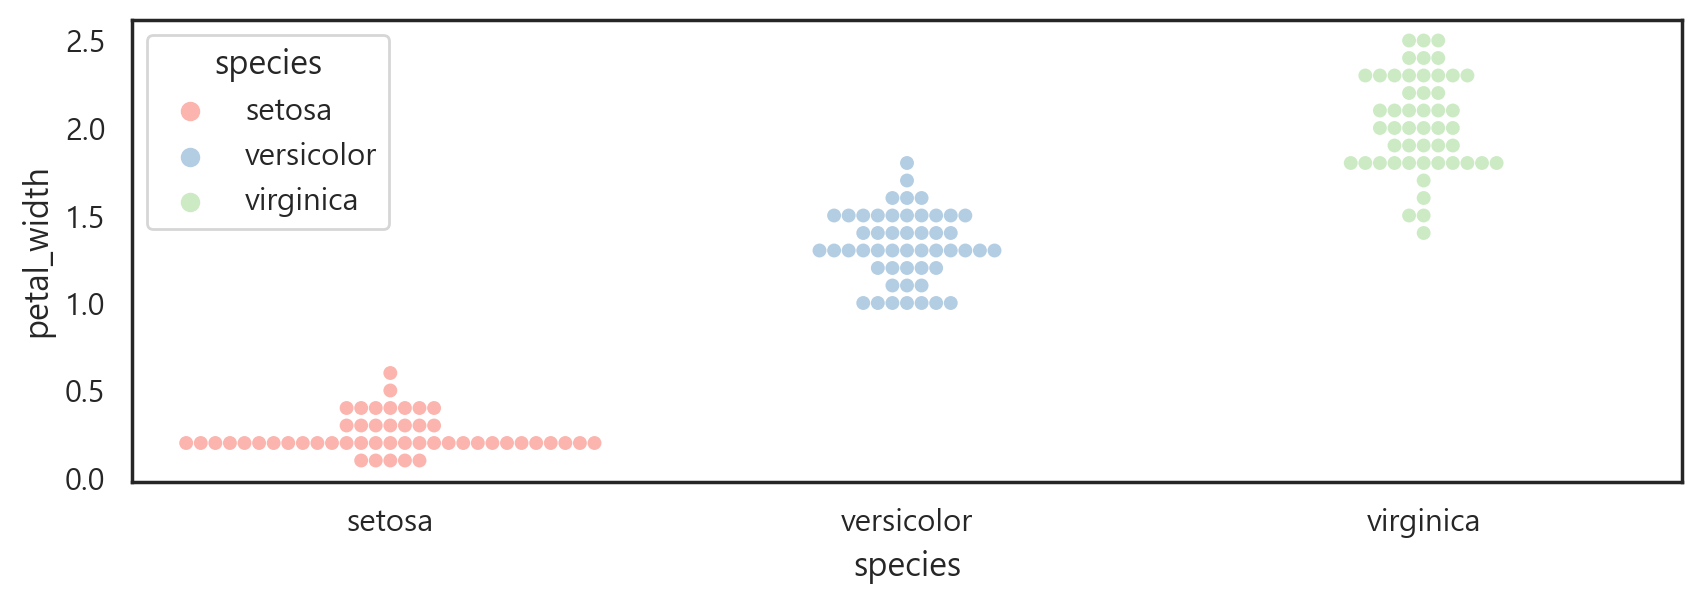

In [52]:
sns.swarmplot(data=iris, x='species', y='petal_width', hue = 'species')
plt.show()

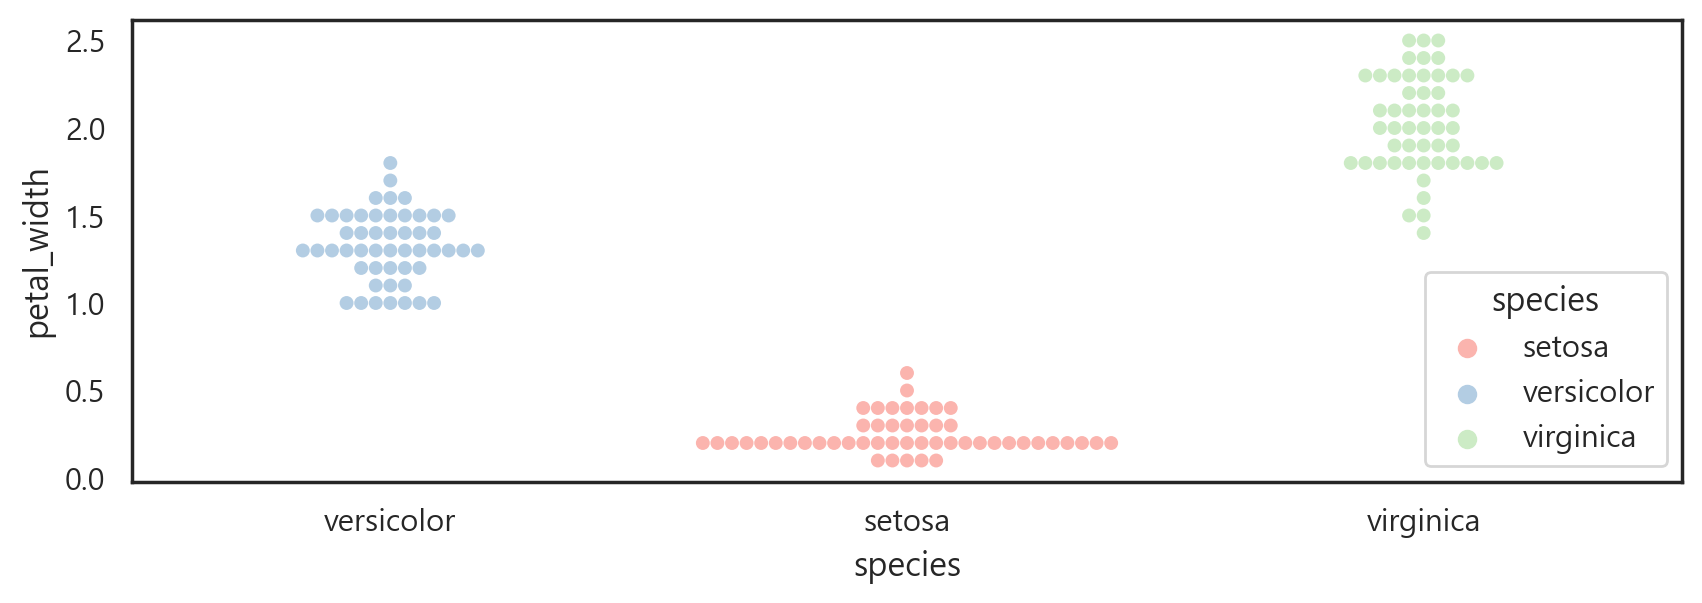

In [54]:
# 범주형그래프의 x 축을 지정하지 않으면
sns.swarmplot(data=iris,
             x='species',
             y='petal_width',
             hue='species',
             order=['versicolor', 'setosa','virginica'])
plt.show()

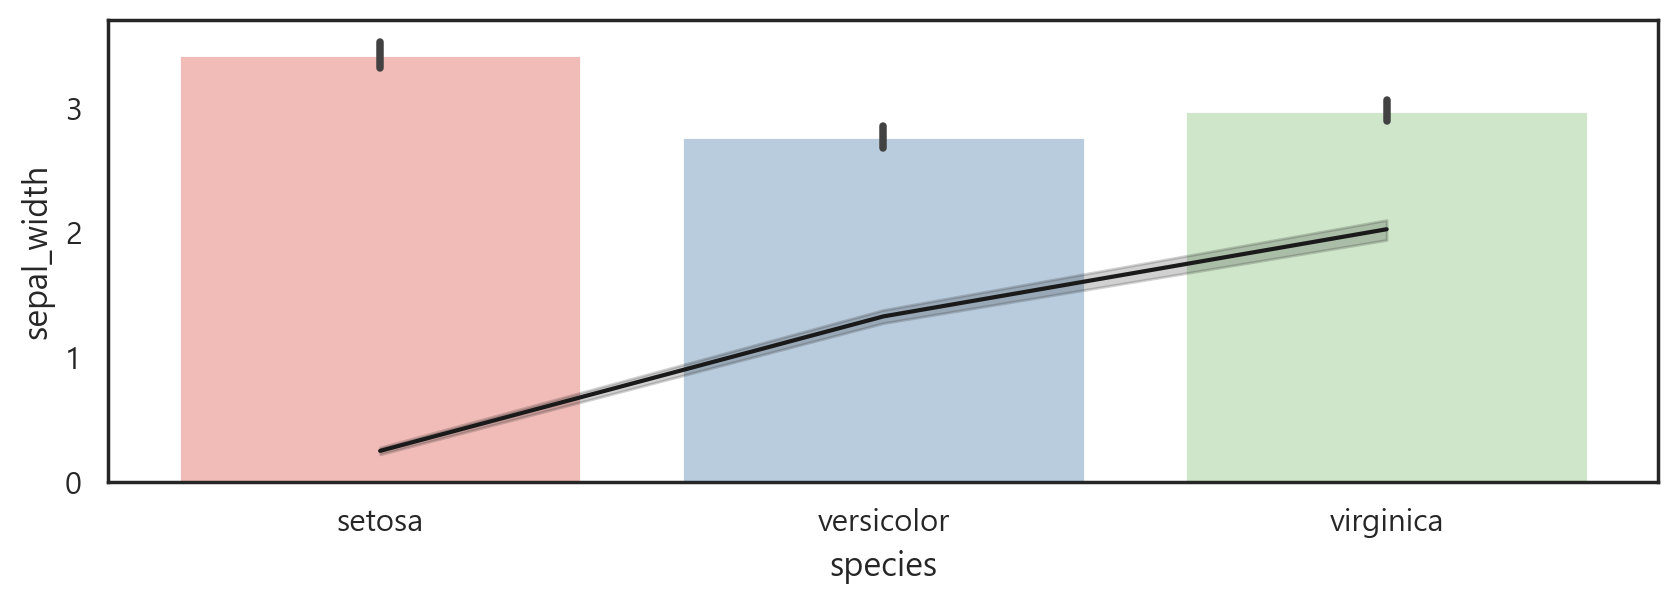

In [61]:
# barplot, barhplot, pointplt : 각 범주별 평균값(y)과 그에대한 신뢰구간
        # 신뢰구간 제외 : errorbar = None
sns.barplot(data=iris, x='species', y='sepal_width')
           # errorbar=None)
sns.lineplot(data=iris, x = 'species', y = 'petal_width', color = 'k')
plt.show()

<Axes: xlabel='species', ylabel='petal_width'>

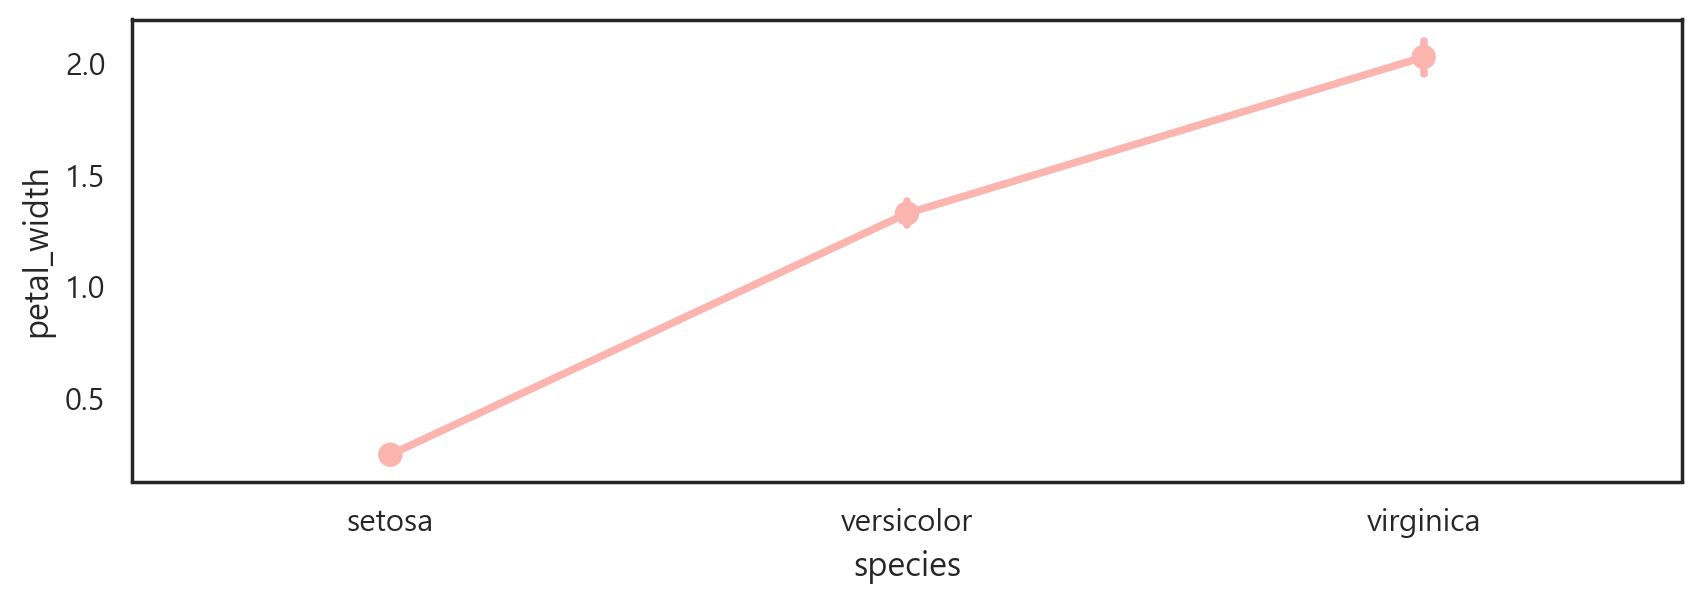

In [62]:
sns.pointplot(data=iris, x='species', y='petal_width',)  # 신뢰구간 제외

In [63]:
# 성별 생존율을 막대그래프
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [65]:
titanic.dtypes.head(3)

survived     int64
pclass       int64
sex         object
dtype: object

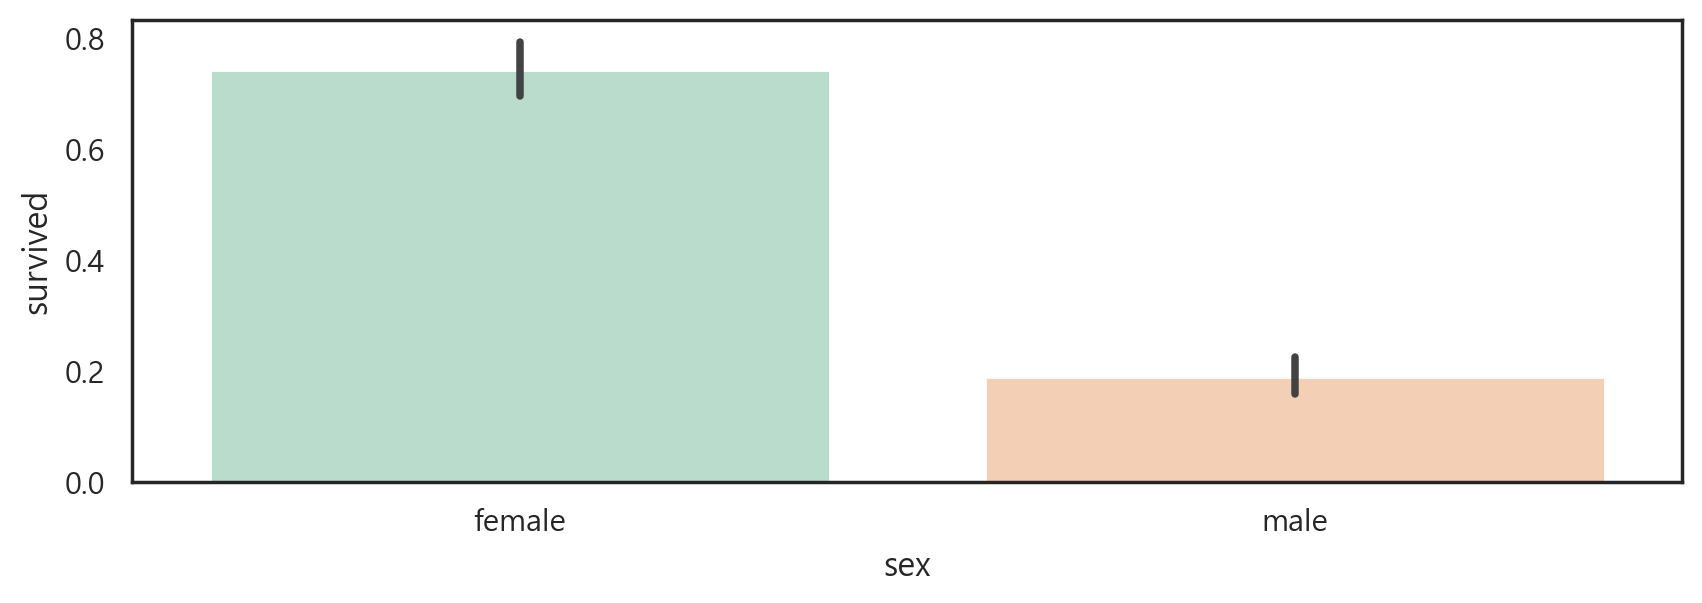

In [66]:
sns.barplot(data=titanic,
             x='sex',
             y='survived',
             order=['female', 'male'],
            palette='Pastel2')
plt.show()

In [68]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [75]:
# 남자 중 사망자
len(titanic[(titanic.sex=='male') & (titanic.survived==0)])

468

In [76]:
# 남자 중 생존자
len(titanic[(titanic.sex=='male') & (titanic.survived==1)])

109

In [77]:
# 여자 중 사망자
len(titanic[(titanic.sex=='female') & (titanic.survived==0)])

81

In [78]:
# 여자 중 생존자
len(titanic[(titanic.sex=='female') & (titanic.survived==1)])

233

In [80]:
titanic.sample(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
23,1,1,male,28.0,0,0,35.500,S,First,man,True,A,Southampton,yes,True
537,1,1,female,30.0,0,0,106.425,C,First,woman,False,NaN,Cherbourg,yes,True


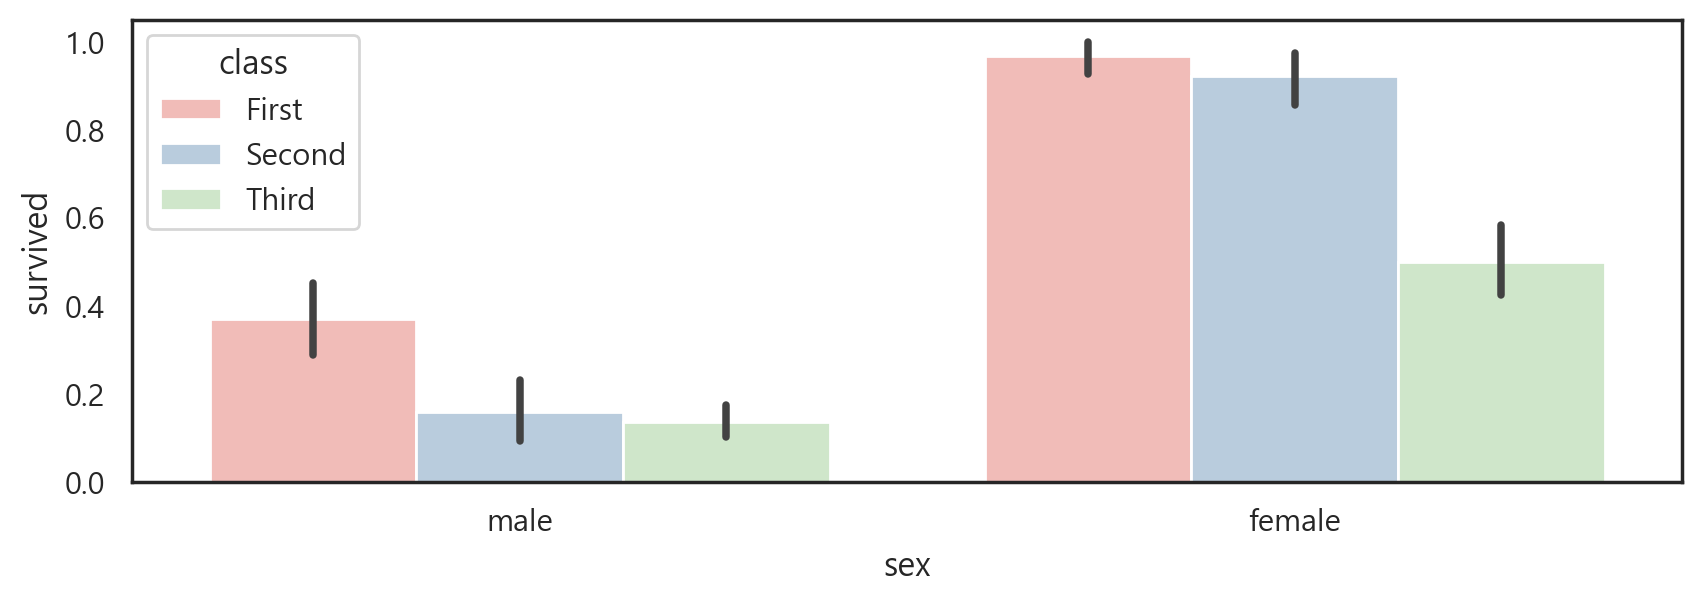

In [81]:
#  성별 생존 hue='class'
sns.barplot(data=titanic, x='sex', y='survived', hue='class')
plt.show()

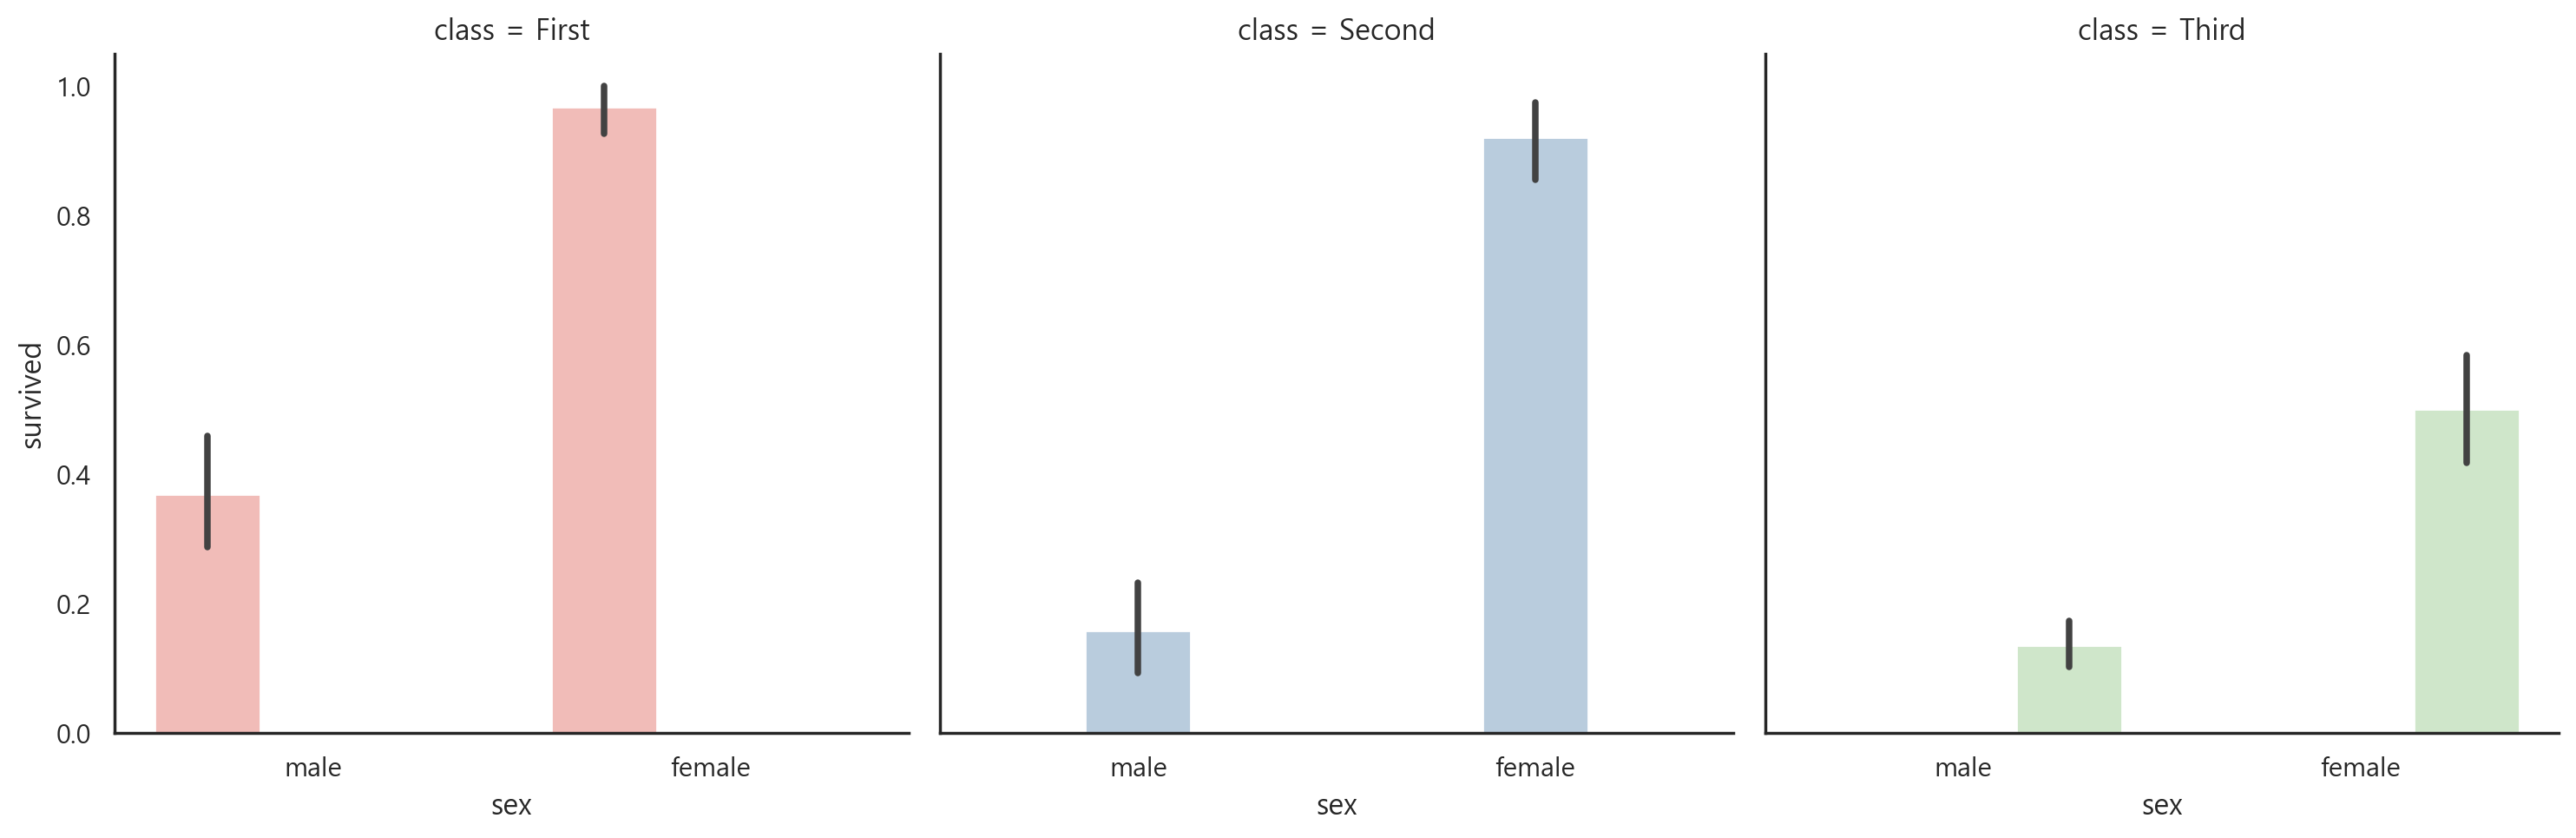

In [84]:
# class 별로 성별 생존률을 서브플롯(막대그래프)
sns.catplot(data=titanic,
            x = 'sex',
           y = 'survived',
           hue='class',
           kind = 'bar',
           col='class',
           #col_wrap=2, # 한행에 그려질 서브플롯 갯수. 기본값은 n   
            # kind bar 를 해주어야 함 기본값은 stripplot
           )
g.fig.set_size_inches(10,3)

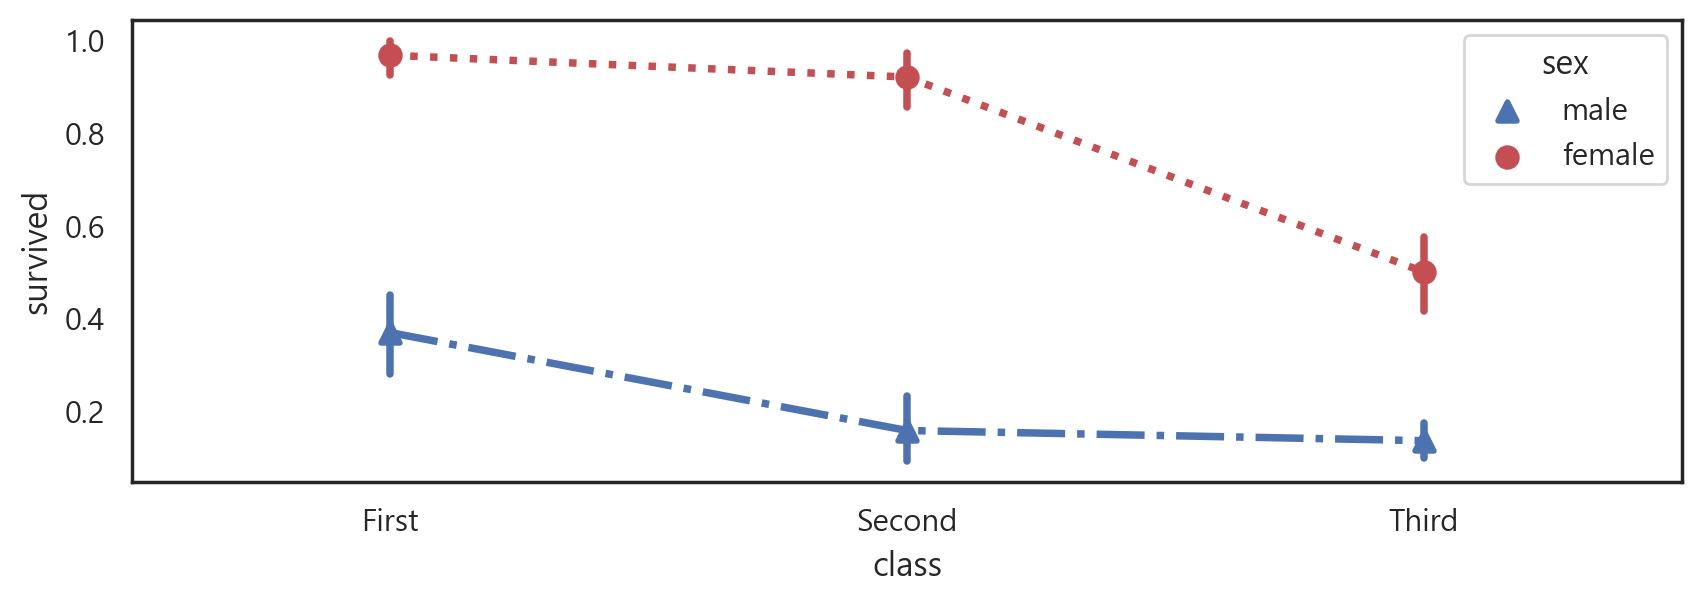

In [86]:
# 성별 생존율 hue='class'
sns.pointplot(data=titanic,
             x = 'class',
             y = 'survived',
             hue = 'sex',
             markers=['^','o'],
             linestyles=['-.',':'],
             palette={'male':'b','female':'r'})
plt.show()

In [93]:
totallen = len(titanic)
nanlen = titanic.deck.isna().sum()
datalen=totallen - nanlen
print('전체 데이터 갯수 {}, 결측치 갯수{}, 데이터 갯수{}'.format(totallen,nanlen,datalen))

전체 데이터 갯수 891, 결측치 갯수688, 데이터 갯수203


In [95]:
# deck 별 갯수를 막대그래프(countplot)
sns.countplot(data=titanic, x='deck',
              
plt.show()

SyntaxError: unterminated string literal (detected at line 2) (2006610178.py, line 2)

In [99]:
deckcnt = titanic.deck.value_counts() # 범주별 데이터 갯수()
deckcnt # deckcnt.index 가 count 가 큰순

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

<Axes: xlabel='sex', ylabel='age'>

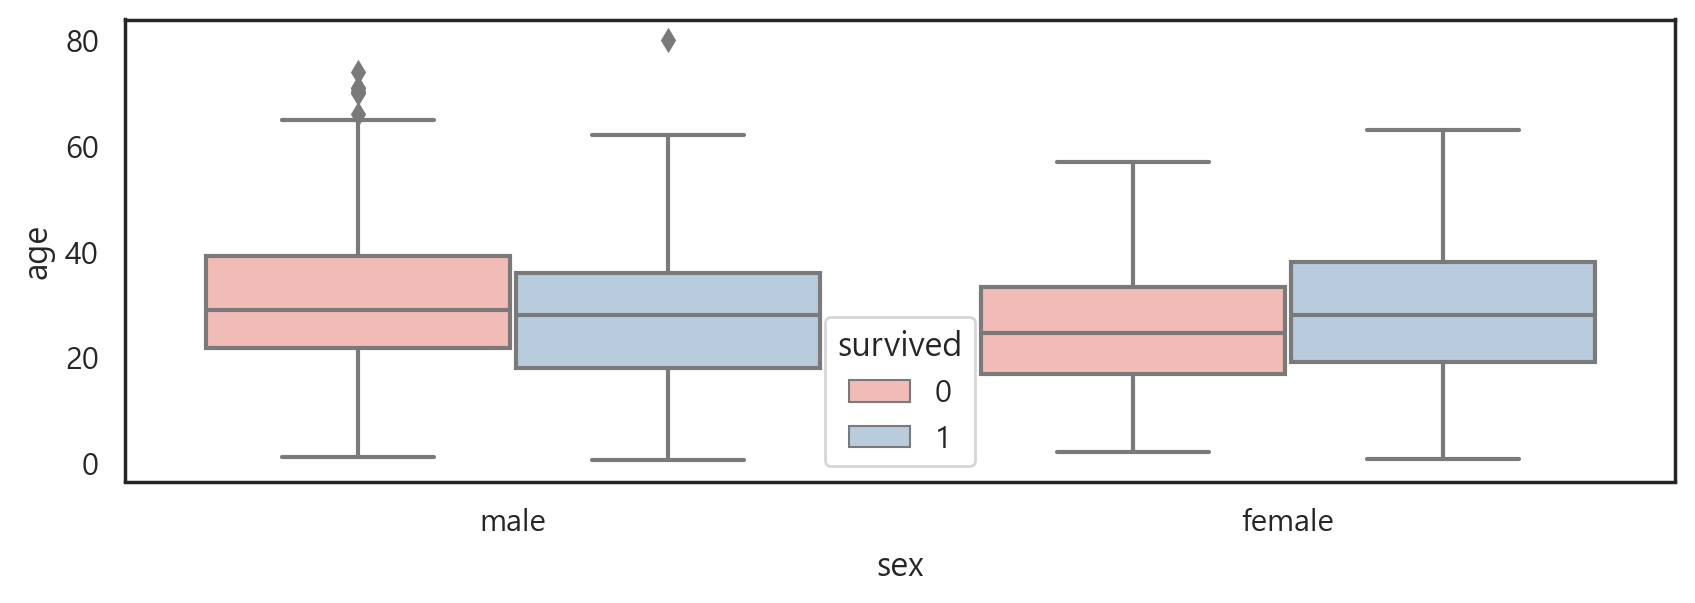

In [103]:
# boxplot
sns.boxplot(data = titanic, x = 'sex', y='age', hue = 'survived')

<Axes: xlabel='sex', ylabel='age'>

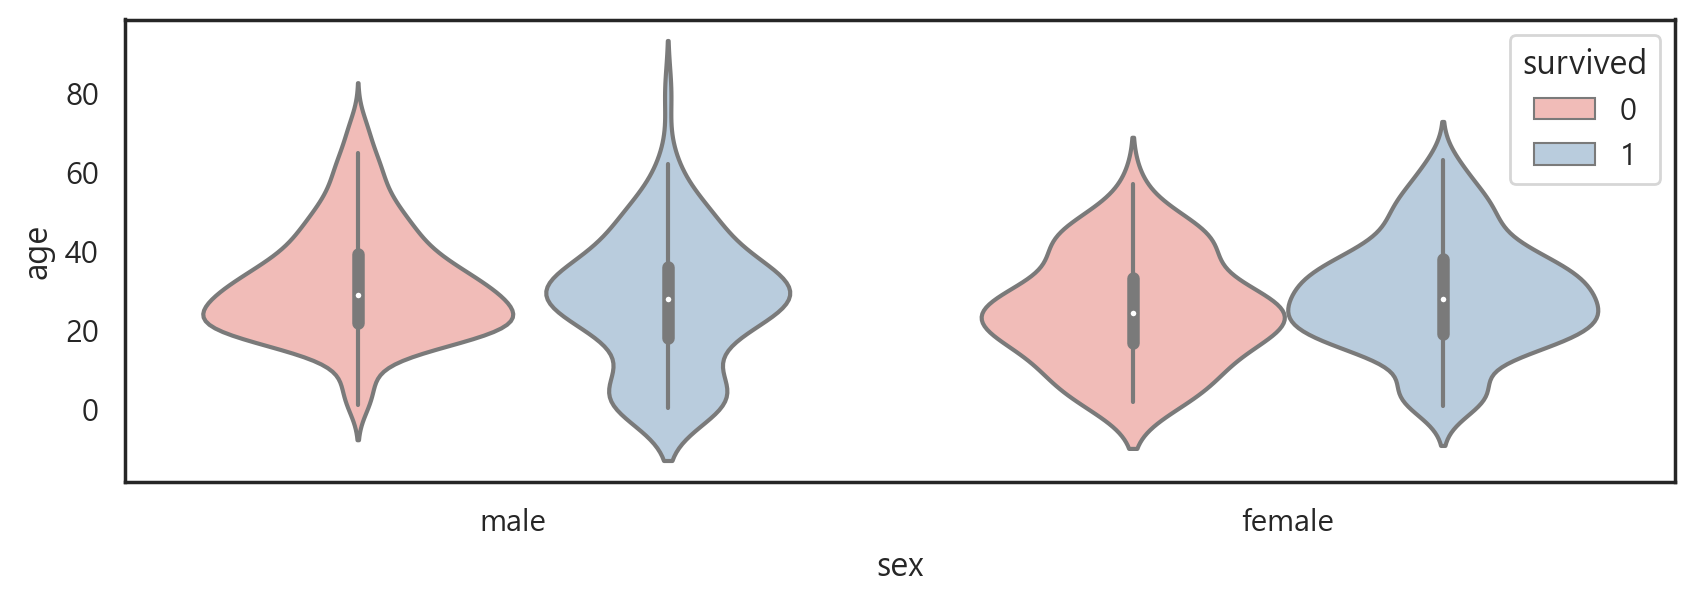

In [104]:
sns.violinplot(data = titanic, x = 'sex', y='age', hue = 'survived')

<Axes: xlabel='age', ylabel='sex'>

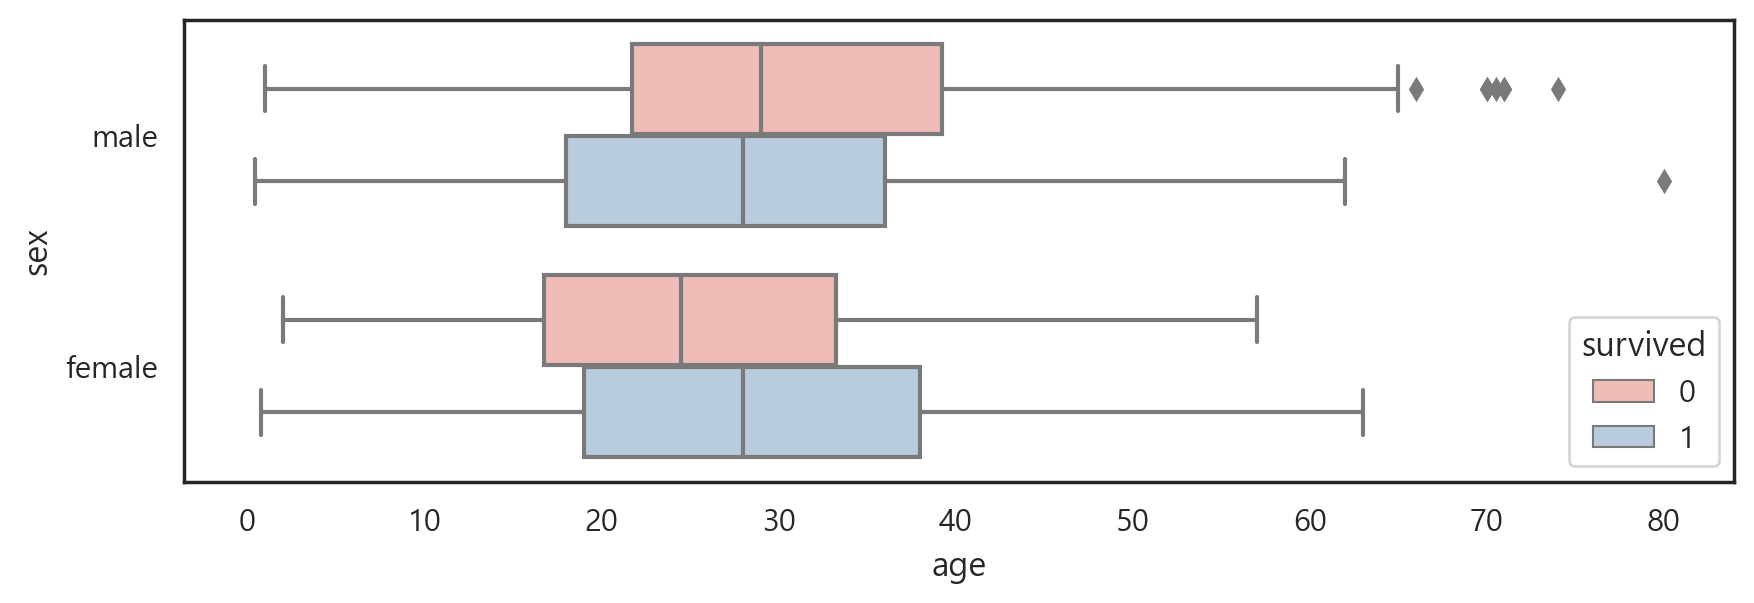

In [105]:
sns.boxplot(data = titanic, y = 'sex', x='age', hue = 'survived')

<Axes: xlabel='sex', ylabel='age'>

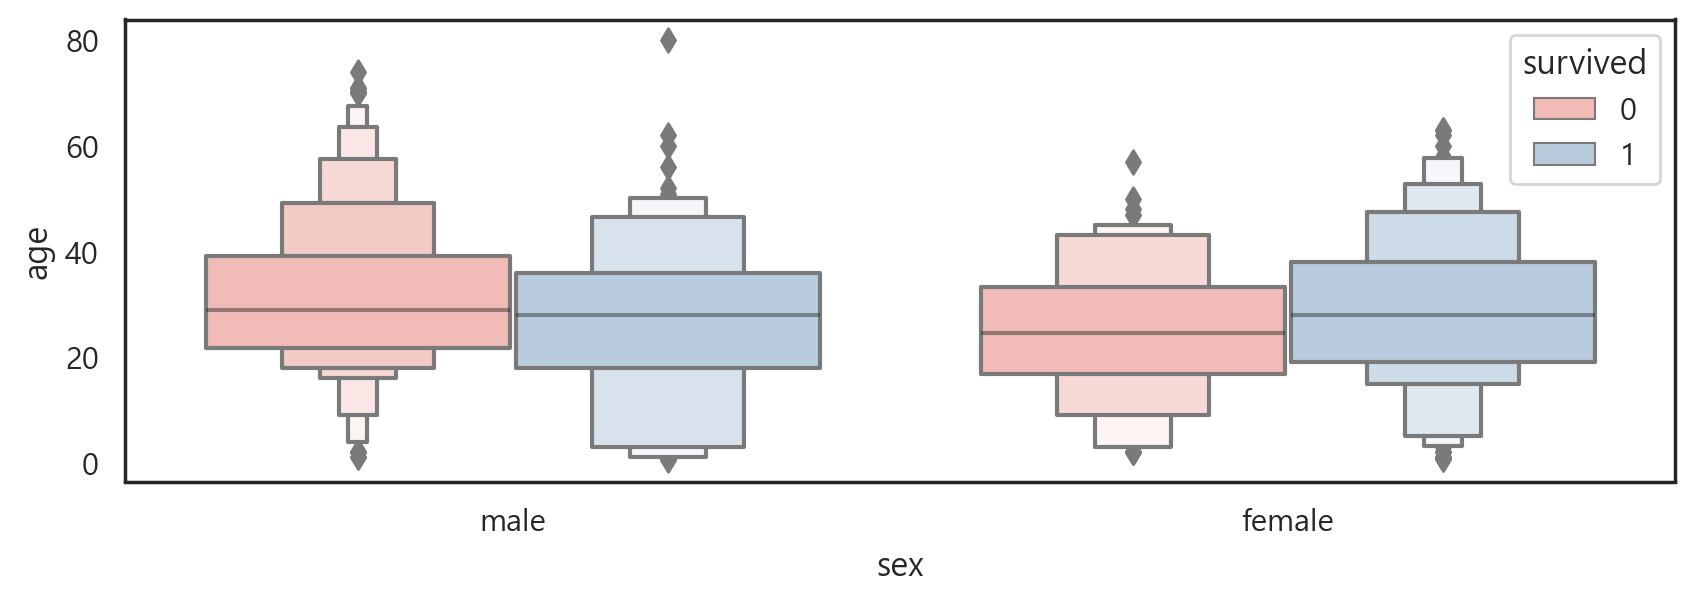

In [106]:
# boxenplot 은 boxplot 에 분포를 추가한 기능
sns.boxenplot(data = titanic, x = 'sex', y='age', hue = 'survived')

### 3) 쌍관계 그래프
- pairplot : 데이터프레임에 포함된 모든 수치형 변수 쌍에 대해 산점도(scatter)와 히스토그램

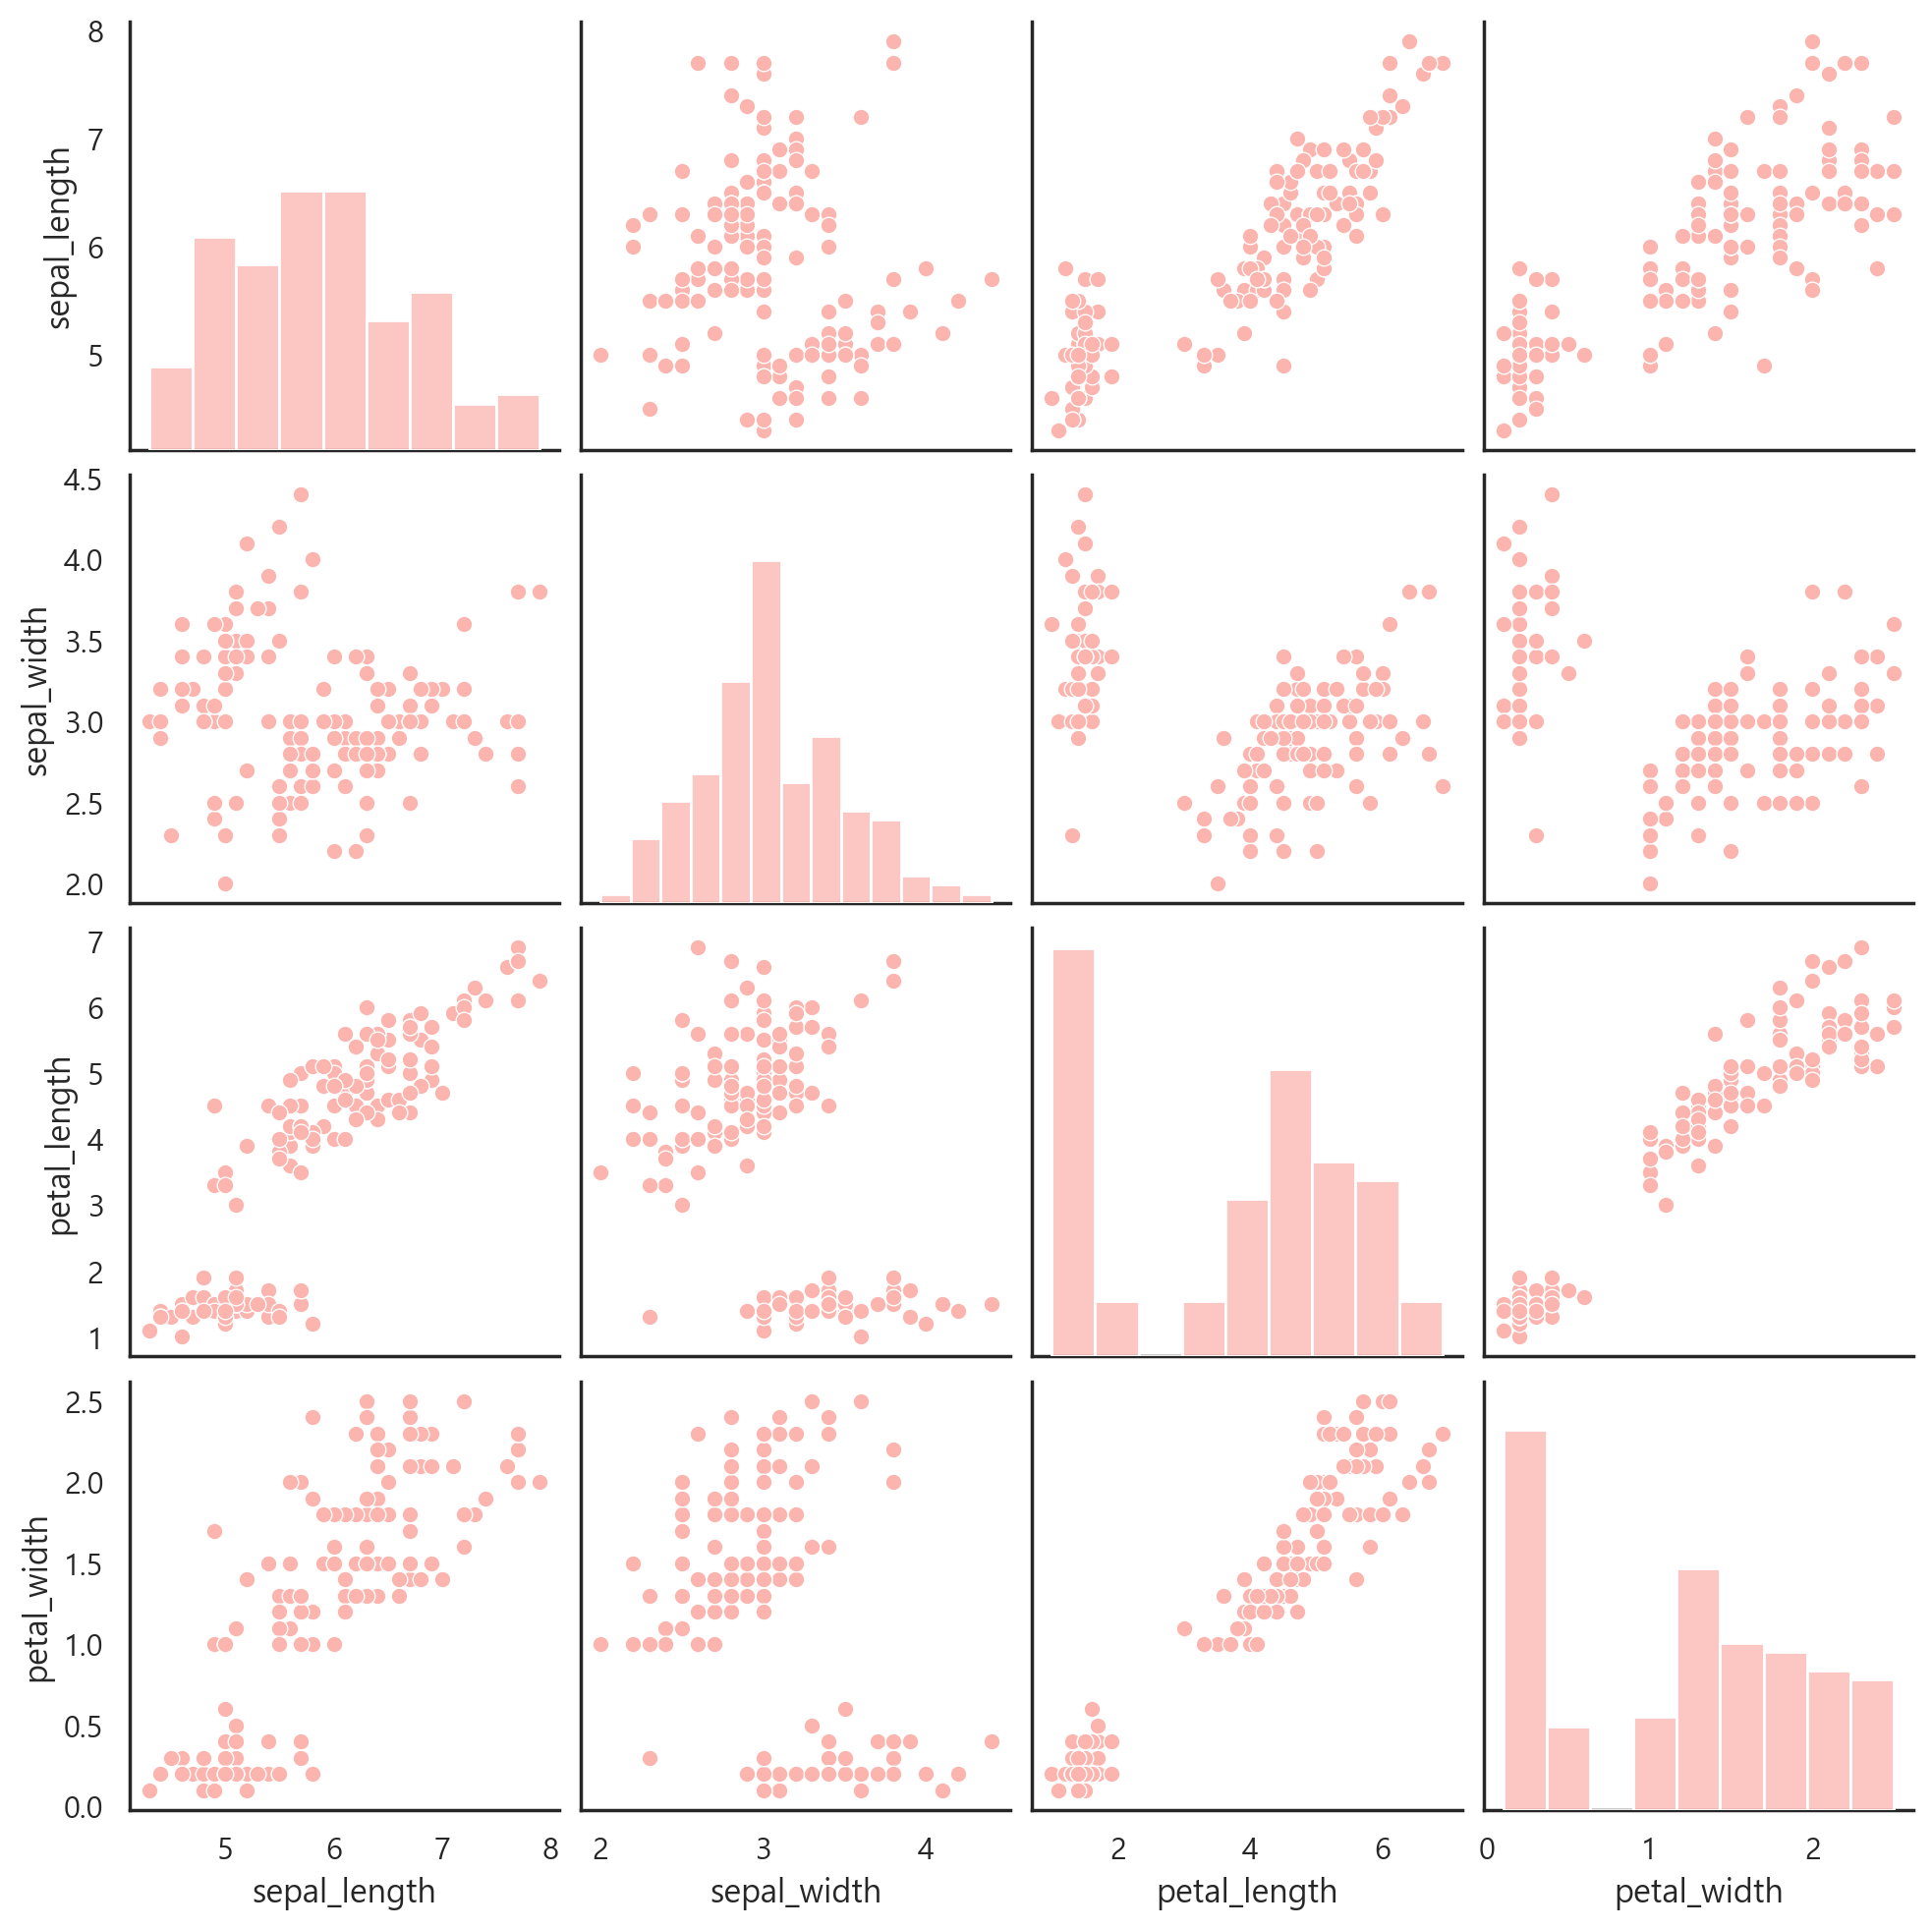

In [107]:
sns.pairplot(data=iris)

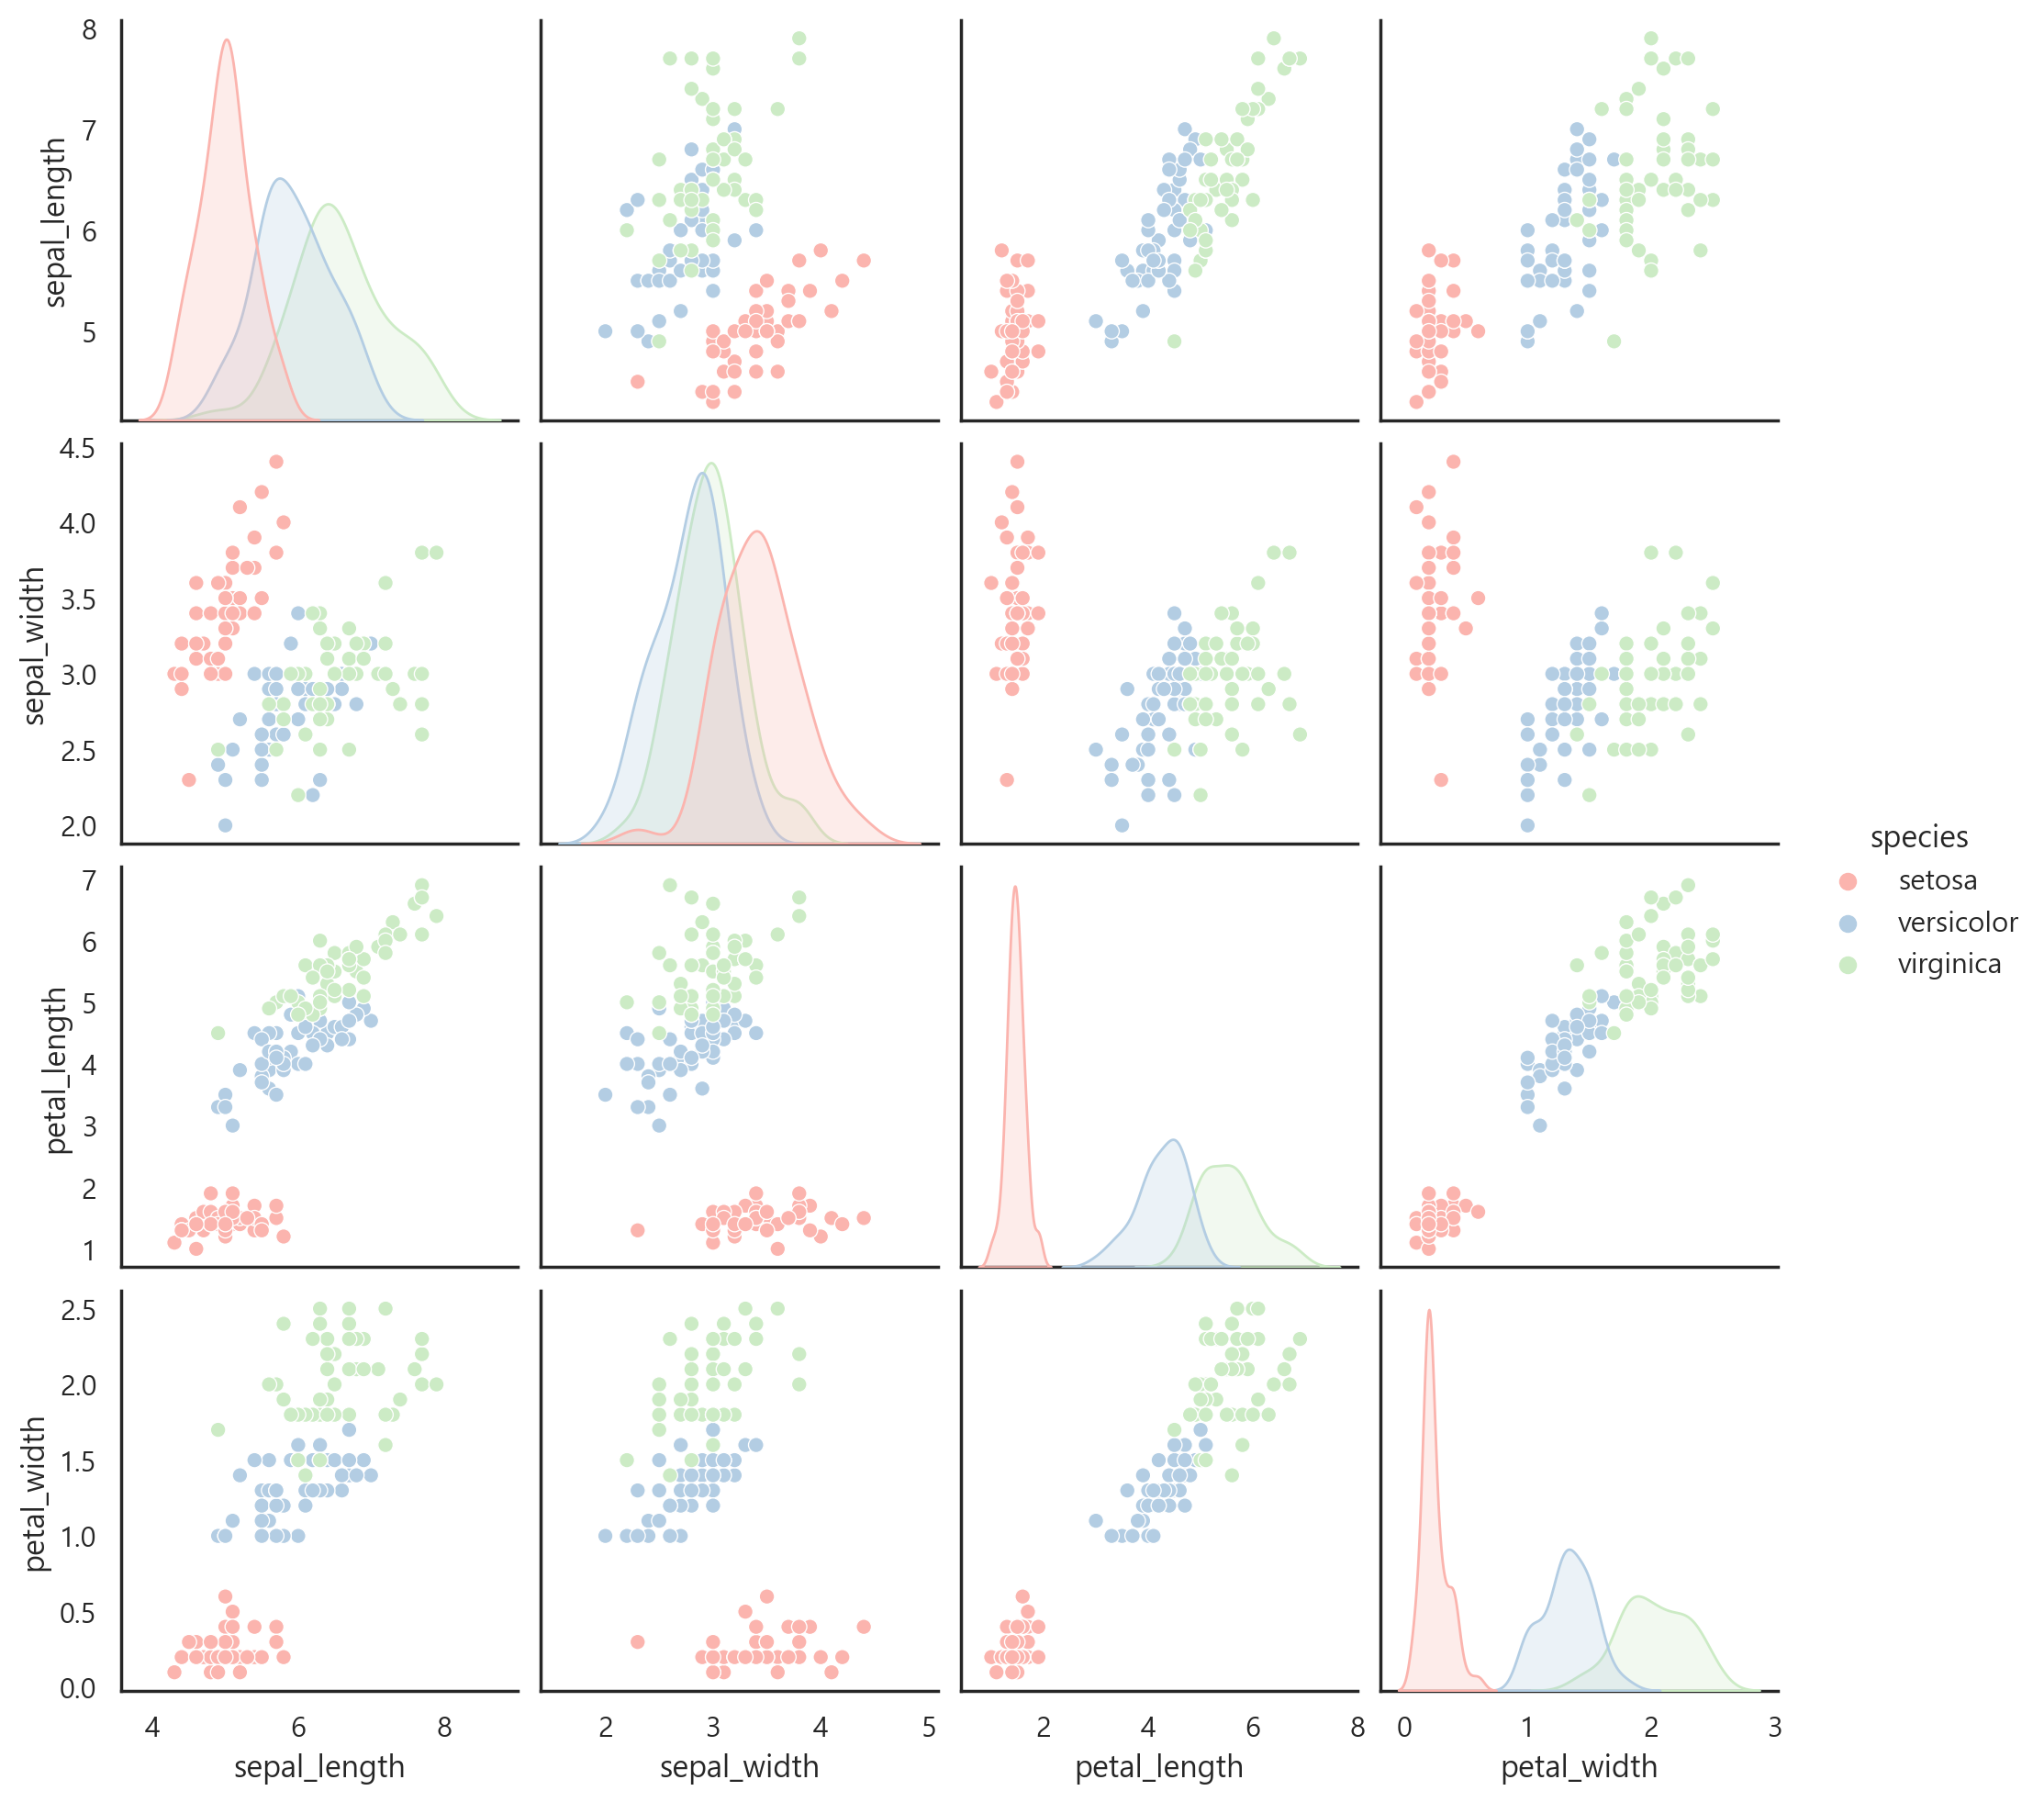

In [108]:
sns.pairplot(data=iris,hue='species')

### 4)밀도 그래프

In [110]:
import numpy as np
x = np.random.randn(10000)
x

array([ 0.91950595, -1.20821962, -1.26271067, ..., -2.12414836,
       -0.73570557, -1.03770828])

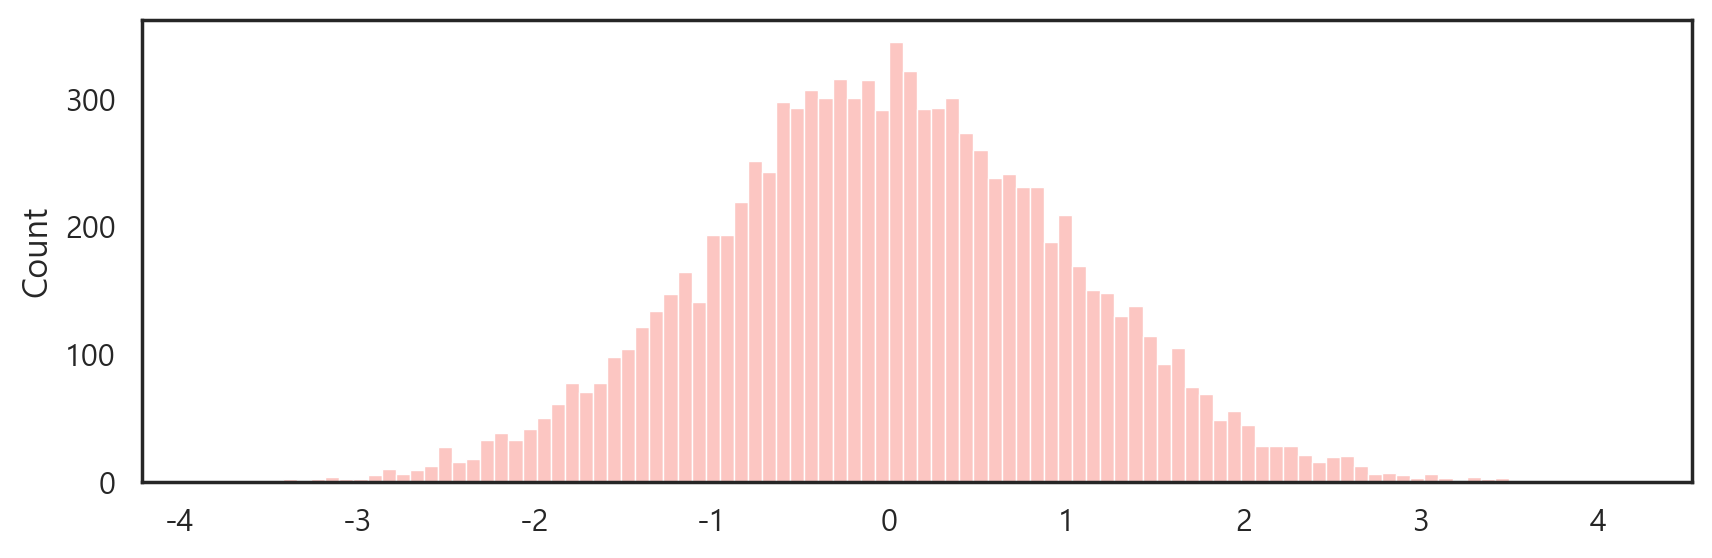

In [114]:
sns.histplot(x, bins=100)
plt.show()

### 5) 회귀 그래프

In [115]:
corr = iris.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [116]:
# 회귀 그래프 : regplot(hue 사용 불가), lmplo
sns.regplot(data=iris, x = 'petal_length', y='petal_width', hue='species')

TypeError: regplot() got an unexpected keyword argument 'hue'

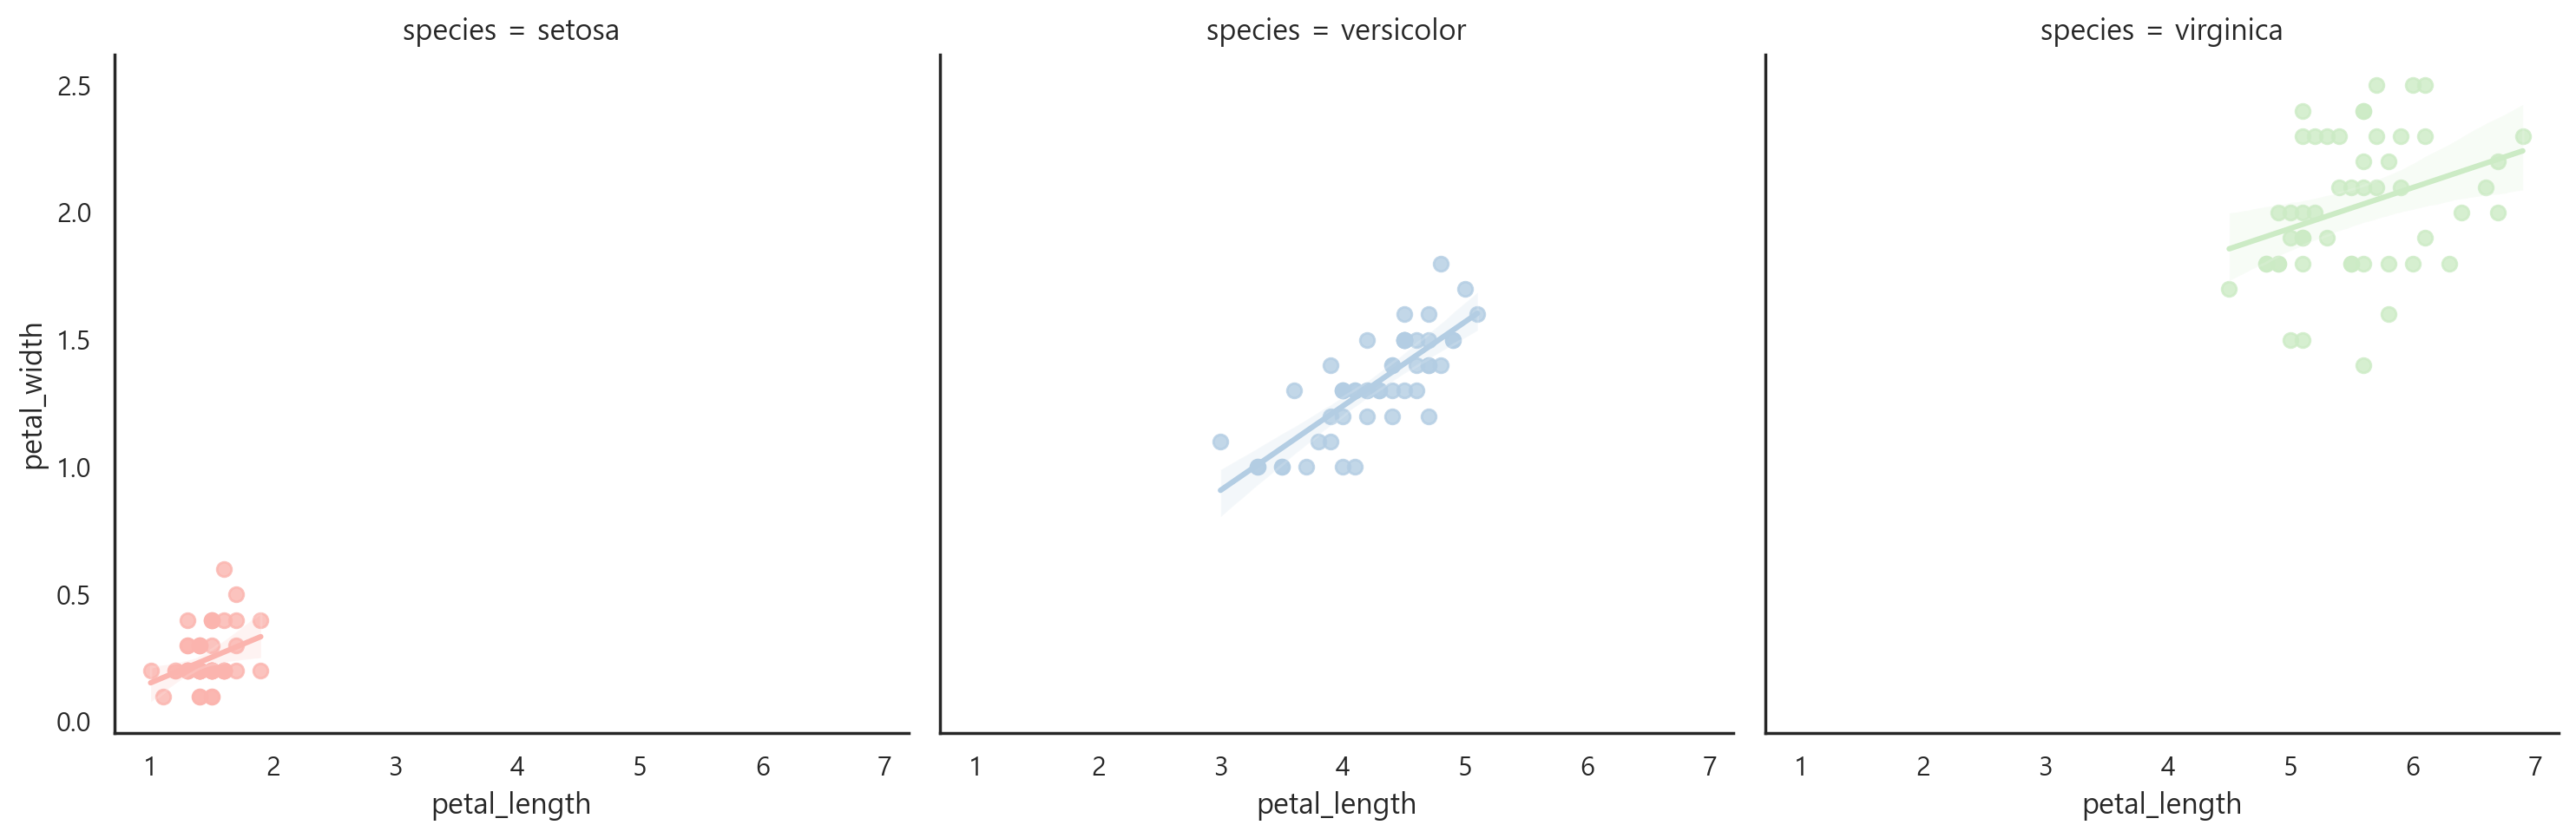

In [121]:
# 종별 회귀 그래프
sns.lmplot(data=iris, x='petal_length', y='petal_width',
           hue ='species',
           col='species')
plt.show()

## 2.4 다중그래프를 위한 FacetGrid

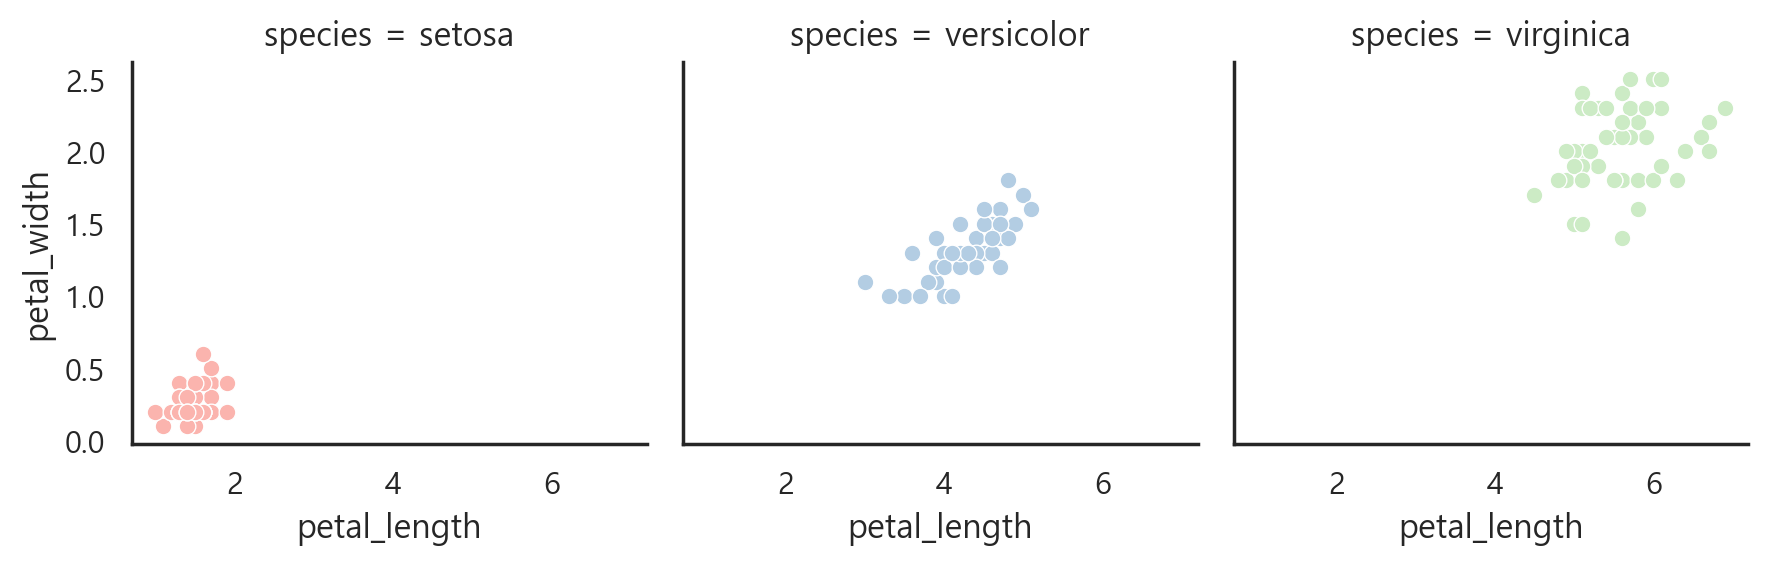

In [122]:
g = sns.FacetGrid(iris, col='species', hue='species')
g.map(sns.scatterplot, 'petal_length', 'petal_width')
plt.show()

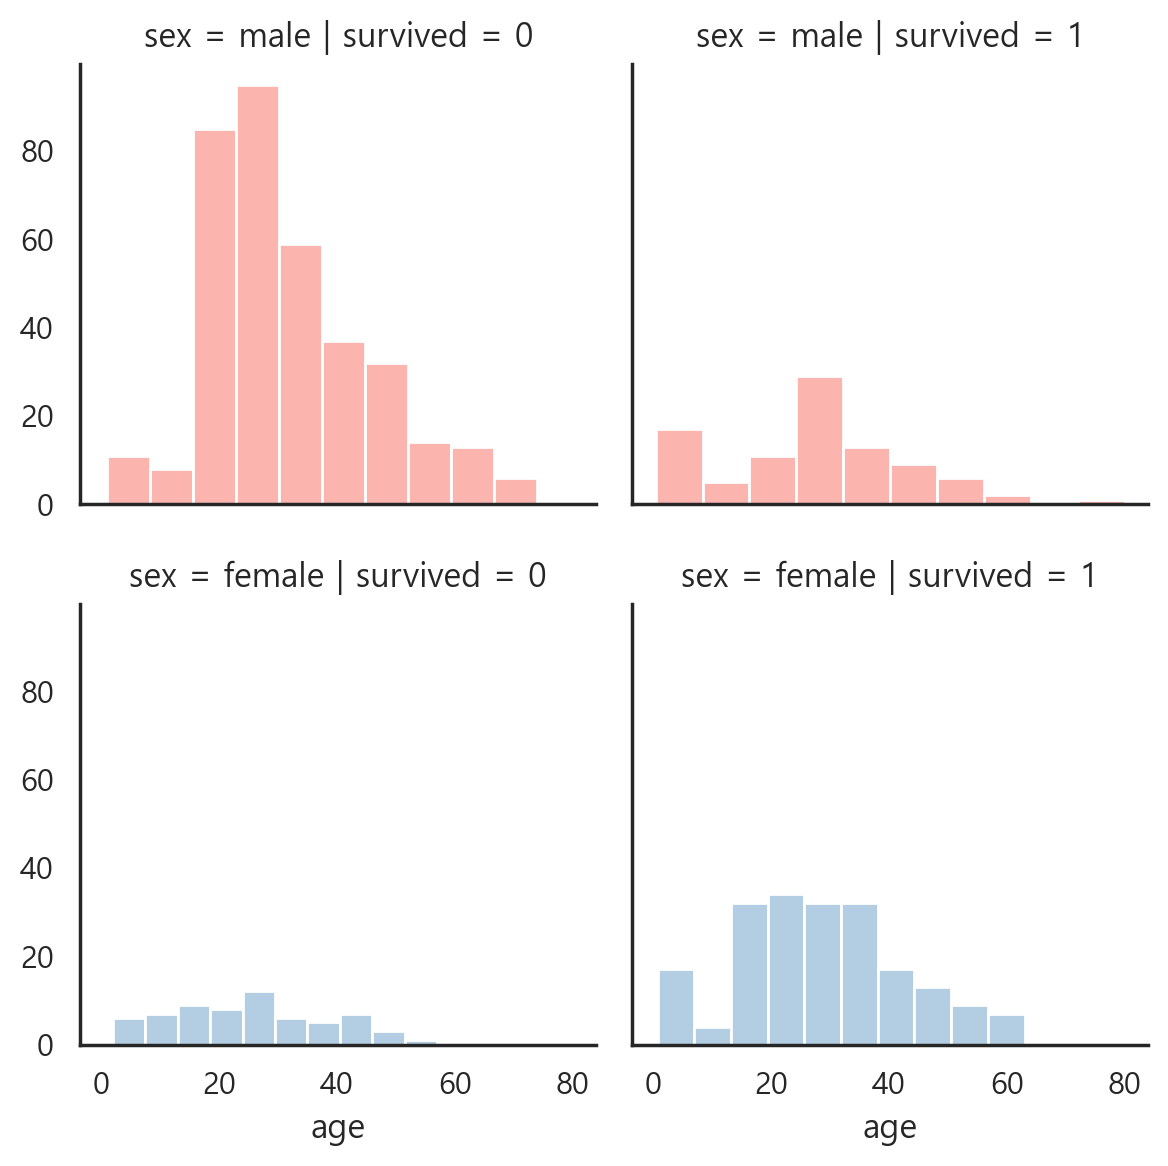

In [125]:
g = sns.FacetGrid(titanic, col='survived', hue='sex', row='sex')
g.map(plt.hist,'age')
plt.show()